# Project 1: SAT & ACT Analysis



## Problem Statement

There are still potential for SAT participation rate to increase across all states. Given the data set of SAT and ACT in 2017 and 2018, we hope to identify insightful trend to suggest effective measures to implement to increase participation rate; especially in states with low SAT participation rate. 

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [96]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [97]:
#Code:
sat_2017 = '../data/sat_2017.csv'
act_2017 = '../data/act_2017_updated.csv'

import pandas as pd
sat17 = pd.read_csv(sat_2017)
act17 = pd.read_csv(act_2017)

#### 2. Display Data

Print the first 10 rows of each dataframe 

In [98]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [99]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The two data sets have different number of column with different header. In Act 2017 data, a national data is also present while the Sat 2017 only has data for each state. Both data has State and Participation as string data and the rest of the data as float data. Furthermore, both ACT and SAT scores are displayed with different subject title, each with different scale of score which I have to take note of when comparing. 

#### 4a. Does the data look complete? 

Answer: Both data seems to be completed (without Nan) with data from 51 states

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

SAT: 400 - 1600 (200 - 800 each)

ACT: 1  - 36

#### 4c. Fixing error

In [100]:
#code
def find_error(test):
    if len(test.columns) == 7:
        for i in range(len(test['English'])): 
            if  (test['English'][i] > 36) |  (test['English'][i] < 1):
                test['English'][i] = np.nan
            if  (test['Math'][i] > 36) |  (test['Math'][i] < 1):
                test['Math'][i] = np.nan
            if  (test['Reading'][i]  > 36) |   (test['Reading'][i]  < 1):
                test['Reading'][i]  = np.nan
            if  (test['Science'][i]  > 36) |   (test['Science'][i]  < 1):
                test['Science'][i]  = np.nan
       
    else:
        for j in range(len(test['Evidence-Based Reading and Writing'])):
            if (test['Evidence-Based Reading and Writing'][j] < 200) | (test['Evidence-Based Reading and Writing'][j] > 800):
                test['Evidence-Based Reading and Writing'][j] = np.nan     
            if (test['Math'][j] < 200) | (test['Math'][j] > 800):
                test['Math'][j]  = np.nan     

    return 

In [101]:
find_error(sat17)
find_error(act17)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
#Finding the null value
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  1
Total                                 0
dtype: int64

In [103]:
sat17 = sat17.fillna(524) #Fixing the null value with the corrected score 524
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### 5. Displaying Data Type

In [104]:
#SAT 2017 
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null float64
Total                                 51 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [105]:
#ACT 2017
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The participation columns in both data sets are non-null object even though we need them as float/integer to make comparison

#### 6. Fix Incorrect Data Types


In [106]:
#code
partofloat = lambda x: float(x[0:-1]) #changing all characters except % to float for participation

- Fix any individual values preventing other columns from being the appropriate type.

In [107]:
#code
sat17['Participation'] = sat17['Participation'].apply(partofloat)
act17['Participation'] = act17['Participation'].apply(partofloat)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [108]:
#code
#function to convert number to float, string to nan 
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

sat17['Evidence-Based Reading and Writing'] = sat17['Evidence-Based Reading and Writing'].apply(to_num)
sat17['Total'] = sat17['Total'].apply(to_num)
sat17['State'] = sat17['State'].apply(lambda x: str(x))
act17['State'] = act17['State'].apply(lambda x: str(x))

- Display the data types again to confirm they are correct.

In [109]:
#Code:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [110]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns


In [111]:
#code
#Replace SAT 2017 data set column name with rename funtion
sat17.rename(columns={'State':'state', 
                      'Participation': '17_sat_part', 
                      'Evidence-Based Reading and Writing': '17_sat_ebrw',
                      'Math':'17_sat_math', 
                      'Total':'17_sat_total' }, inplace=True)
#Replace ACT 2017 data set column name with rename funtion
act17.rename(columns ={'State':'state', 
                       'Participation': '17_act_part', 
                       'English':'17_act_english', 
                       'Math':'17_act_math',
                       'Science':'17_act_science', 
                       'Reading':'17_act_reading',
                       'Composite':'17_act_composite'}, inplace=True)

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT|The state of USA with students participated in SAT & ACT| 
|**17_sat_part**|*float*|SAT|The 2017 participation rate of students of each state for SAT|
|**17_sat_ebrw**|*float*|SAT|The 2017 average score of Evidence-Based Reading and Writing for each state|
|**17_sat_math**|*float*|SAT|The 2017 average score of Math for each state|
|**17_sat_total**|*float*|SAT|The 2017 average total score of SAT for each state|
|**18_sat_part**|*float*|SAT|The 2018 participation rate of students of each state for SAT|
|**18_sat_ebrw**|*float*|SAT|The 2018 average score of Evidence-Based Reading and Writing for each state|
|**18_sat_math**|*float*|SAT|The 2018 average score of Math for each state|
|**18_sat_total**|*float*|SAT|The 2018 average total score of SAT for each state|
|**17_act_part**|*float*|ACT|The 2017 participation rate of students of each state for ACT|
|**17_act_english**|*float*|ACT|The 2017 average score of English for each state|
|**17_act_math**|*float*|ACT|The 2017 average score of Math for each state|
|**17_act_reading**|*float*|ACT|The 2017 average score of Reading for each state|
|**17_act_science**|*float*|ACT|The 2017 average score of Science for each state|
|**17_act_composite**|*float*|ACT|The2017  average composite score of ACT for each state|
|**18_act_part**|*float*|ACT|The 2018 participation rate of students of each state for ACT|
|**18_act_english**|*float*|ACT|The 2018 average score of English for each state|
|**18_act_math**|*float*|ACT|The 2018 average score of Math for each state|
|**18_act_reading**|*float*|ACT|The 2018 average score of Reading for each state|
|**18_act_science**|*float*|ACT|The 2018 average score of Science for each state|
|**18_act_composite**|*float*|ACT|The2018  average composite score of ACT for each state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. 

In [112]:
#code
act17.drop(act17.index[0], inplace=True)

In [113]:
act17.head()

,state,17_act_part,17_act_english,17_act_math,17_act_reading,17_act_science,17_act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [114]:
#Code:
combined_2017 = pd.merge(sat17,act17,on='state') #merging 2 data sets on state

#### 11. Save merged dataframe

In [115]:
#code
combined_2017.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

In [116]:
sat_2018 = '../data/sat_2018.csv'
act_2018 = '../data/act_2018_updated.csv'

import pandas as pd
sat18 = pd.read_csv(sat_2018) #reading SAT 2018 file as SAT18
act18 = pd.read_csv(act_2018) #reading ACT 2018 file as ACT18

#Defining function to find error (if any) that has values beyond possible score of SAT & ACT 2018
def find_error18(test):
    if len(test.columns) == 7: #check if passed in df is ACT or SAT, ACT has 7 columns while sat has 5
        for i in range(len(test['Average English Score'])): 
            if  (test['Average English Score'][i] > 36) |  (test['Average English Score'][i] < 1):
                test['Average English Score'][i] = np.nan
            if  (test['Average Math Score'][i] > 36) |  (test['Average Math Score'][i] < 1):
                test['Average Math Score'][i] = np.nan
            if  (test['Average Reading Score'][i]  > 36) |   (test['Average Reading Score'][i]  < 1):
                test['Average Reading Score'][i]  = np.nan
            if  (test['Average Science Score'][i]  > 36) |   (test['Average Science Score'][i]  < 1):
                test['Average Science Score'][i]  = np.nan
    else:    
        for j in range(len(test['Evidence-Based Reading and Writing'])):
            if (test['Evidence-Based Reading and Writing'][j] < 200) | (test['Evidence-Based Reading and Writing'][j] > 800):
                test['Evidence-Based Reading and Writing'][j] = np.nan     
            if (test['Math'][j] < 200) | (test['Math'][j] > 800):
                test['Math'][j]  = np.nan     
        
    return 

#Running the function
find_error18(sat18)
find_error18(act18)

#To remove % in SAT 2018 data and convert values from string to float
sat18['Participation'] = sat18['Participation'].apply(partofloat)

#To convert SAT 2018 Envidence-Based Reading and Writing, Math & Total data to float type
sat18['Evidence-Based Reading and Writing'] = sat18['Evidence-Based Reading and Writing'].apply(to_num)
sat18['Math'] = sat18['Math'].apply(to_num)
sat18['Total'] = sat18['Total'].apply(to_num)

#To convert ACT 2018 Percentage of Students Tested to float type
act18['Percentage of Students Tested'] = act18['Percentage of Students Tested'].apply(to_num)

#Replace SAT 2018 data set column name with rename funtion
sat18.rename(columns={'State':'state', 'Participation': '18_sat_part', 'Evidence-Based Reading and Writing': '18_sat_ebrw', 'Math':'18_sat_math', 'Total':'18_sat_total' }, inplace=True)

#Replace ACT 2018 data set column name with rename funtion
act18.rename(columns ={'State':'state', 'Percentage of Students Tested': '18_act_part', 'Average English Score':'18_act_english', 'Average Math Score':'18_act_math', 'Average Science Score':'18_act_science', 'Average Reading Score':'18_act_reading','Average Composite Score':'18_act_composite'}, inplace=True)

#combining 2018 file
combined_2018 = pd.merge(sat18,act18,on='state') #merging 2 data sets on state

#displaying combined file
combined_2018.head()

,state,18_sat_part,18_sat_ebrw,18_sat_math,18_sat_total,18_act_part,18_act_composite,18_act_english,18_act_math,18_act_reading,18_act_science
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine 2017 and 2018 data into a single dataframe

In [117]:
#combining 2017 & 2018 data
final = pd.merge(combined_2017,combined_2018,on='state')
#writing to .csv
final.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### 1. Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [118]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
17_sat_part,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
17_sat_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
17_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
17_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
17_act_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
17_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
17_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
17_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
17_act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
17_act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [119]:
#Function to calculate standard deviation
def sd(data):
    mean = 0
    stand_dev = []
    #To assign nan value to 1st item in the list as it correspond to 'state'
    stand_dev.append(np.nan)
    #looping through each column in data
    for i in data: 
        #pass to next loop for the first column
        if i == 'state':
            pass
        else:
            #Calculate the mean for each column & assign to a temporary mean variable
            mean = data[i].mean()
            #Reset the temp variable for each i loop to reset calculation for STD
            temp = 0
            #looping through each row in each column to calculate variance
            for j in data[i]:
                #To pass if encounter a nan value in the data (Only 1 in this project)
                if np.isnan(j):
                    pass
                else:
                    #Sum up the temporary (x-mean)**2 value for the whole column
                    temp = temp + (j - mean)**2
            #Add the caculated STD to the stand_dev list        
            stand_dev.append(np.sqrt(temp/len(data)))  
            
    #Return the completed standard deviation list        
    return stand_dev

In [120]:
#Code:
sd_dict = dict(zip(final.keys(),sd(final)))
sd_dict

{'state': nan,
 '17_sat_part': 34.92907076664508,
 '17_sat_ebrw': 45.21697020437866,
 '17_sat_math': 46.65713364485503,
 '17_sat_total': 91.58351056778743,
 '17_act_part': 31.824175751231806,
 '17_act_english': 2.3304876369363363,
 '17_act_math': 1.9624620273436781,
 '17_act_reading': 2.0469029314842646,
 '17_act_science': 1.7222161451443676,
 '17_act_composite': 2.000786081581989,
 '18_sat_part': 36.946619223539415,
 '18_sat_ebrw': 47.03460978357609,
 '18_sat_math': 47.30194550378352,
 '18_sat_total': 93.22742384464433,
 '18_act_part': 33.745194881997506,
 '18_act_composite': 2.0855261815801147,
 '18_act_english': 2.4222536143202795,
 '18_act_math': 2.015707255555717,
 '18_act_reading': 2.145891884510421,
 '18_act_science': 1.8516885484833543}

In [121]:
#Using np.std to calculate standard deviation
for i in final:
    if i != 'state':
        mean_temp = np.std(final[i])
        print(mean_temp)

34.92907076664508
45.21697020437866
46.65713364485503
91.58351056778743
31.824175751231806
2.3304876369363363
1.9624620273436781
2.0469029314842646
1.7222161451443676
2.000786081581989
36.946619223539415
47.03460978357609
47.30194550378352
93.22742384464433
33.745194881997506
2.0855261815801147
2.4222536143202795
2.015707255555717
2.145891884510421
1.8516885484833543


There is slight difference between the manually calculated standard deviations with pandas describe. The standard deviation value of both manually calculated and numpy method is the same. 

#### Investigate trends in the data

#### The Highest & Lowest Participated State for SAT & ACT in both Years

In [122]:
#Creating masking to find highest  & lowest participation rate for SAT & ACT in both years
highest_sat2017 = (final['17_sat_part']== final['17_sat_part'].max()) #Highest SAT 2017
lowest_sat2017 = (final['17_sat_part'] == final['17_sat_part'].min()) #Lowest SAT 2017
highest_sat2018 = final['18_sat_part'] == final['18_sat_part'].max()  #Highest SAT 2018
lowest_sat2018 = final['18_sat_part'] == final['18_sat_part'].min()   #Lowest SAT 2018

highest_act2017 = (final['17_act_part'] == final['17_act_part'].max())
lowest_act2017 = (final['17_act_part'] == final['17_act_part'].min())
highest_act2018 = (final['18_act_part'] == final['18_act_part'].max())
lowest_act2018 = (final['18_act_part'] == final['18_act_part'].min())

In [123]:
#Highest participated state for SAT 2017
final[highest_sat2017][['state','17_sat_part']]

,state,17_sat_part
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


In [124]:
#Lowest participated state for SAT 2017
final[lowest_sat2017][['state','17_sat_part']]

,state,17_sat_part
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


In [125]:
#Highest participated state for SAT 2018
final[highest_sat2018][['state','18_sat_part']]

,state,18_sat_part
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


In [126]:
#Lowest participated state for SAT 2018
final[lowest_sat2018][['state','18_sat_part']]

,state,18_sat_part
34,North Dakota,2.0


In [127]:
#Highest participated state for ACT 2017
final[highest_act2017][['state','17_act_part']]

,state,17_act_part
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


In [128]:
#Lowest participated state for ACT 2017
final[lowest_act2017][['state','17_act_part']]

,state,17_act_part
19,Maine,8.0


In [129]:
#Highest participated state for ACT 2018
final[highest_act2018][['state','18_act_part']]

,state,18_act_part
0,Alabama,100.0
3,Arkansas,100.0
17,Kentucky,100.0
18,Louisiana,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
27,Nebraska,100.0
28,Nevada,100.0
33,North Carolina,100.0


In [130]:
#Lowest participated state for ACT 2018
final[lowest_act2018][['state','18_act_part']]

,state,18_act_part
19,Maine,7.0


#### SAT2017

**Highest Participated State**: 

Connecticut, Delaware, District of Columbia & Michigan

**Lowest Participated State**: 

Iowa, Mississippi & North Dakota

#### SAT2018

**Highest Participated State**:

Colorado, Connecticut, Delaware, Idaho & Michigan

**Lowest Participated State**: 

North Dakota

#### ACT2017

**Highest Participated State**: 

Alabama, Arkansas, Colorado , Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

#### ACT2018

**Highest Participated State**: 

Alabama, Arkansas , Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

#### The Highest & Lowest Mean Total/Composite Score State for SAT & ACT in both Years

In [131]:
#SAT 2017 highest mean total score
final.sort_values('17_sat_total',ascending=False).head()[['state','17_sat_total']]

,state,17_sat_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [132]:
#SAT 2017 lowest mean total score
final.sort_values('17_sat_total',ascending=True).head()[['state','17_sat_total']]

,state,17_sat_total
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


In [133]:
#SAT 2018 highest mean total score
final.sort_values('18_sat_total',ascending=False).head()[['state','18_sat_total']]

,state,18_sat_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


In [134]:
#SAT 2018 lowest mean total score
final.sort_values('18_sat_total',ascending=True).head()[['state','18_sat_total']]

,state,18_sat_total
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


In [135]:
#ACT 2017 highest mean total score
final.sort_values('17_act_composite',ascending=False).head()[['state','17_act_composite']]

,state,17_act_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [136]:
#ACT 2017 lowest mean total score
final.sort_values('17_act_composite',ascending=True).head()[['state','17_act_composite']]

,state,17_act_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [137]:
#ACT 2018 highest mean total score
final.sort_values('18_act_composite',ascending=False).head()[['state','18_act_composite']]

,state,18_act_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [138]:
#ACT 2018 lowest mean total score
final.sort_values('18_act_composite',ascending=True).head()[['state','18_act_composite']]

,state,18_act_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


##### SAT2017

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

##### SAT2018

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

##### ACT2017

**Highest Composite Score State**: 

New Hampshire		

**Lowest Composite Score State**: 

Nevada	


##### ACT2018

**Highest Composite Score State**: 

Connecticut	

**Lowest Composite Score State**:  

Nevada	

#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [139]:
#SAT
final[(final['17_sat_part'] == 100) | (final['18_sat_part'] == 100)][['state','17_sat_part','18_sat_part']]

,state,17_sat_part,18_sat_part
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


Colorado has an increase of 809% in SAT participation rate

District of Columnbia has a decrease of 8.69% in SAT participation rate

Idaho has an increase of 7.52% in SAT participation rate

In [140]:
#ACT
final[(final['17_act_part'] == 100) | (final['18_act_part'] == 100)][['state','17_act_part','18_act_part']]

,state,17_act_part,18_act_part
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
23,Minnesota,100.0,99.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0
26,Montana,100.0,100.0
27,Nebraska,84.0,100.0


Colorado has a decrease of 70% in ACT participation rate

Minnesota has a decrease of 1 % in ACT participation rate

Nebraska has an increase of 19% in ACT participation rate

Ohio has an increase of 33.3% in ACT participation rate

#### Do any states show have >50% participation on both tests either year?

In [141]:
#2017
print('Number of states >50% participation on both test in 2017: ' + str(len(final[(final['17_sat_part'] > 50) & (final['17_act_part'] > 50)][['state','17_sat_part','17_act_part']])))
final[(final['17_sat_part'] > 50) & (final['17_act_part'] > 50)][['state','17_sat_part','17_act_part']]

Number of states >50% participation on both test in 2017: 3


,state,17_sat_part,17_act_part
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [142]:
#2018
print('Number of states > 50% participation on both test in 2018: ' + str(len(final[(final['18_sat_part'] > 50) & (final['18_act_part'] > 50)][['state','18_sat_part','18_act_part']])))
final[(final['18_sat_part'] > 50) & (final['18_act_part'] > 50)][['state','18_sat_part','18_act_part']]

Number of states > 50% participation on both test in 2018: 5


,state,18_sat_part,18_act_part
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

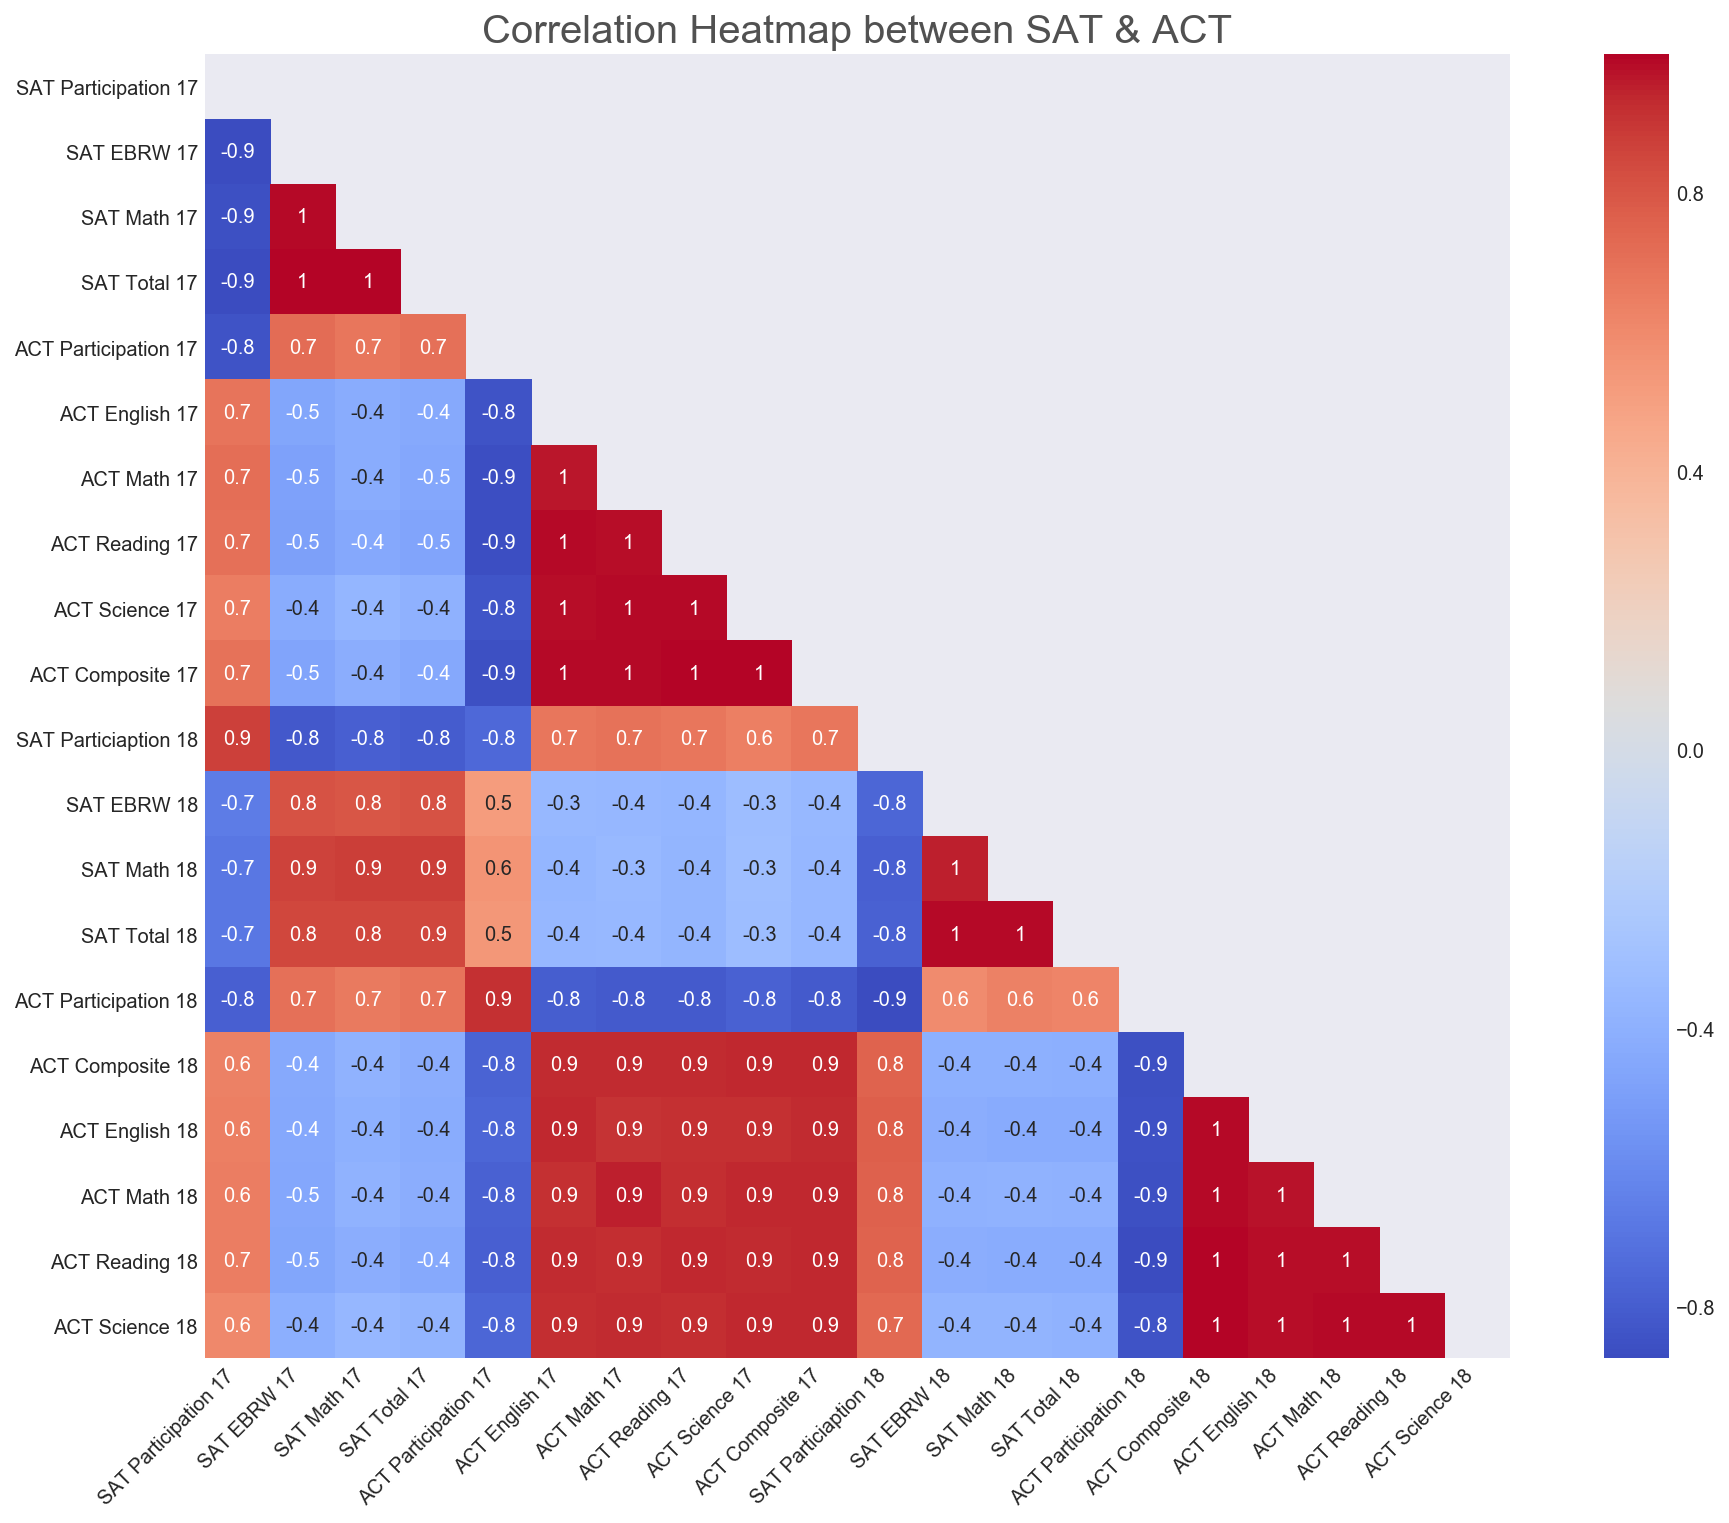

In [143]:
#Calculating correlation of final
final_corr = final.corr()

#Setting up the x and y label in a list
label = ['SAT Participation 17', 'SAT EBRW 17', 'SAT Math 17', 'SAT Total 17', 
         'ACT Participation 17', 'ACT English 17', 'ACT Math 17', 'ACT Reading 17', 
         'ACT Science 17', 'ACT Composite 17', 'SAT Particiaption 18', 'SAT EBRW 18', 
         'SAT Math 18', 'SAT Total 18', 'ACT Participation 18', 'ACT Composite 18','ACT English 18', 
         'ACT Math 18', 'ACT Reading 18', 'ACT Science 18']

#Setting up plot size
plt.figure(figsize=(15,12))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True

#plot design & title
ax = sns.heatmap(final_corr,mask=mask, cmap='coolwarm',annot=True,xticklabels = label, 
                 yticklabels=label, square = True, fmt='.1g')
ax.set_title('Correlation Heatmap between SAT & ACT',fontsize = 20,fontweight = 4, y = 2,alpha=0.8)
#Rotate X label for readability
plt.xticks(rotation = 45)

#Offsetting X label to the right
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

**Intepretation**

In general, the subject score of SAT has a inverse relationship with the corresponding ACT subject score. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [235]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,13) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], label = list_of_xlabels[i], bins = 20) # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i],fontsize = 8,fontweight = 2, alpha=0.8)
        ax[i].set_ylabel('No. of occurrance',fontsize = 8,fontweight = 2, alpha=0.8)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

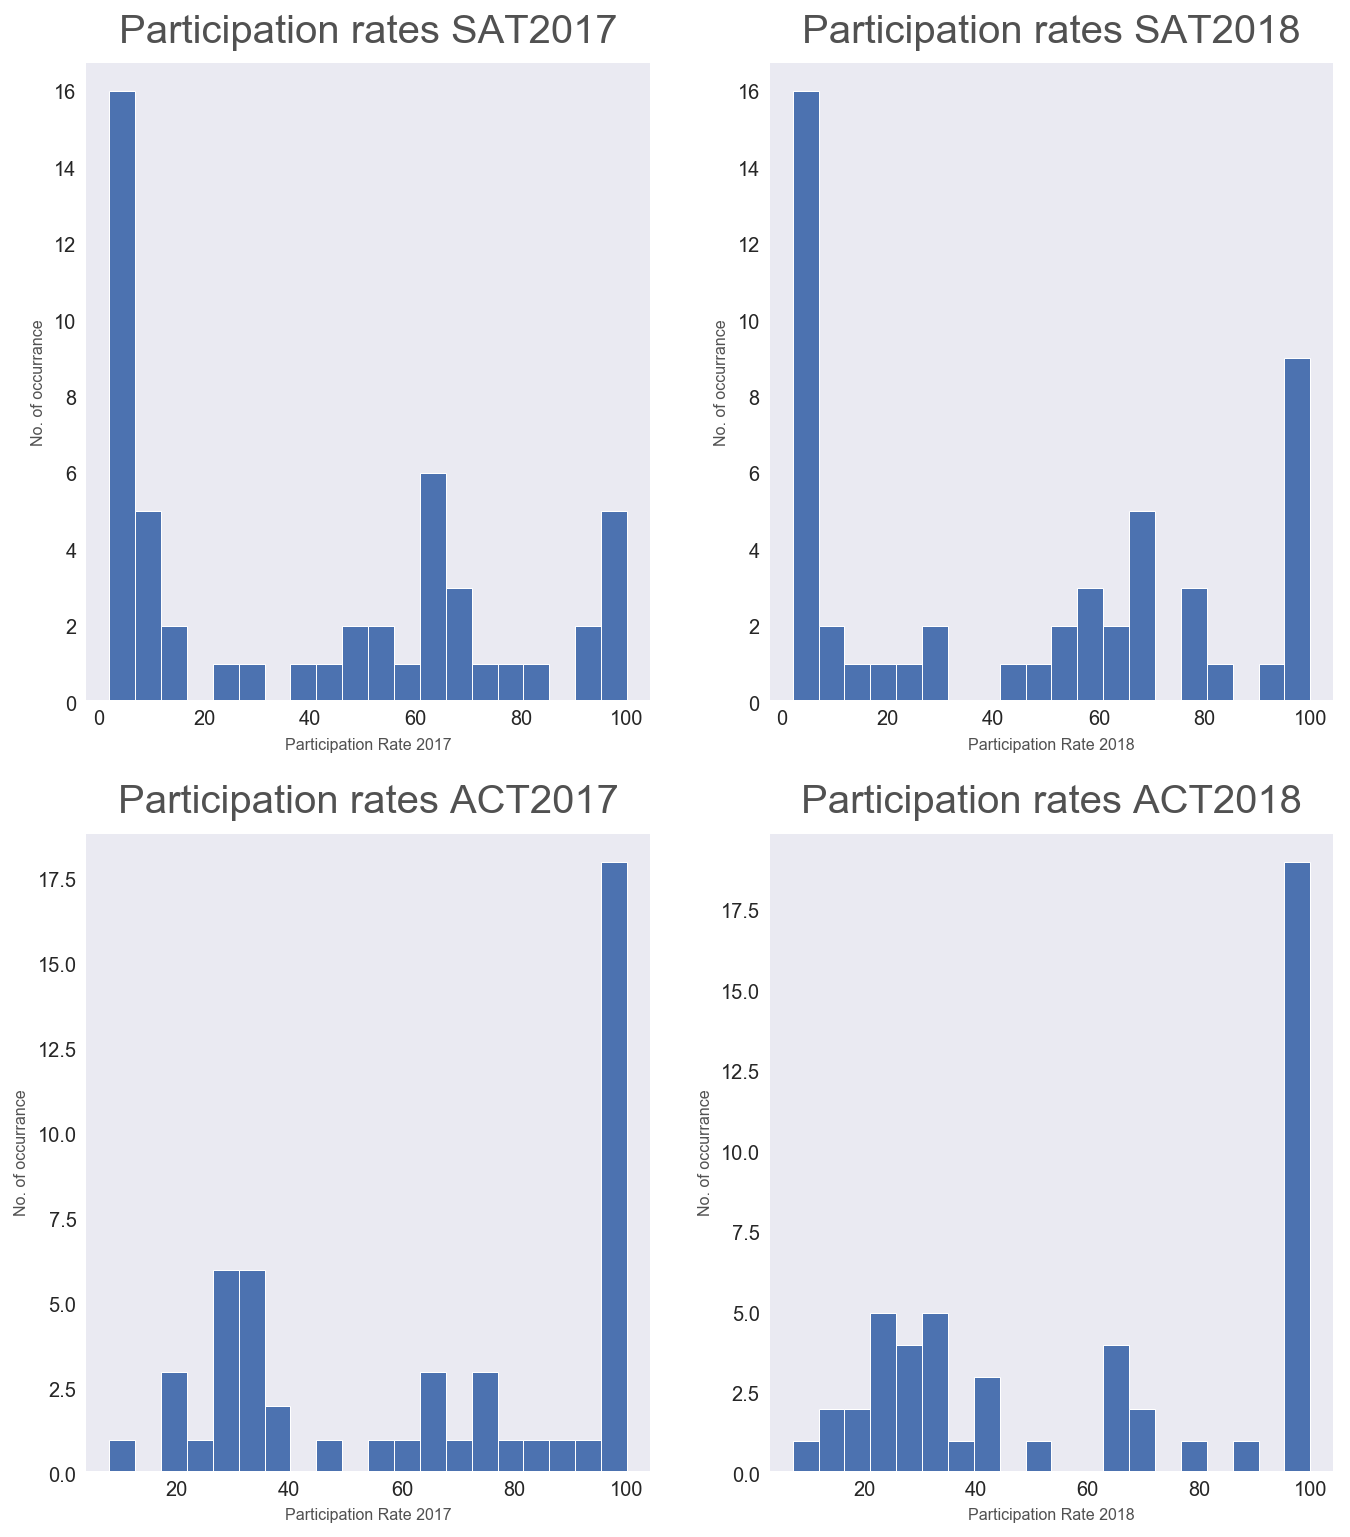

In [236]:
# Plotting Participation rates for SAT & ACT

#Setting up titles
list_of_titles1 = ['Participation rates SAT2017', 'Participation rates SAT2018','Participation rates ACT2017', 'Participation rates ACT2018']
#Setting up labels
list_of_xlabels1 = ['Participation Rate 2017', 'Participation Rate 2018','Participation Rate 2017', 'Participation Rate 2018']
#Setting up columns
list_of_columns1 = [final.columns[1], final.columns[11],final.columns[5], final.columns[15]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Interpretation**

There are more states with 100% participation rate for SAT in 2018 as compare to 2017. For ACT, it seems to have lesser states with low participation rate but no sigificant increase in states with high participation rate. 

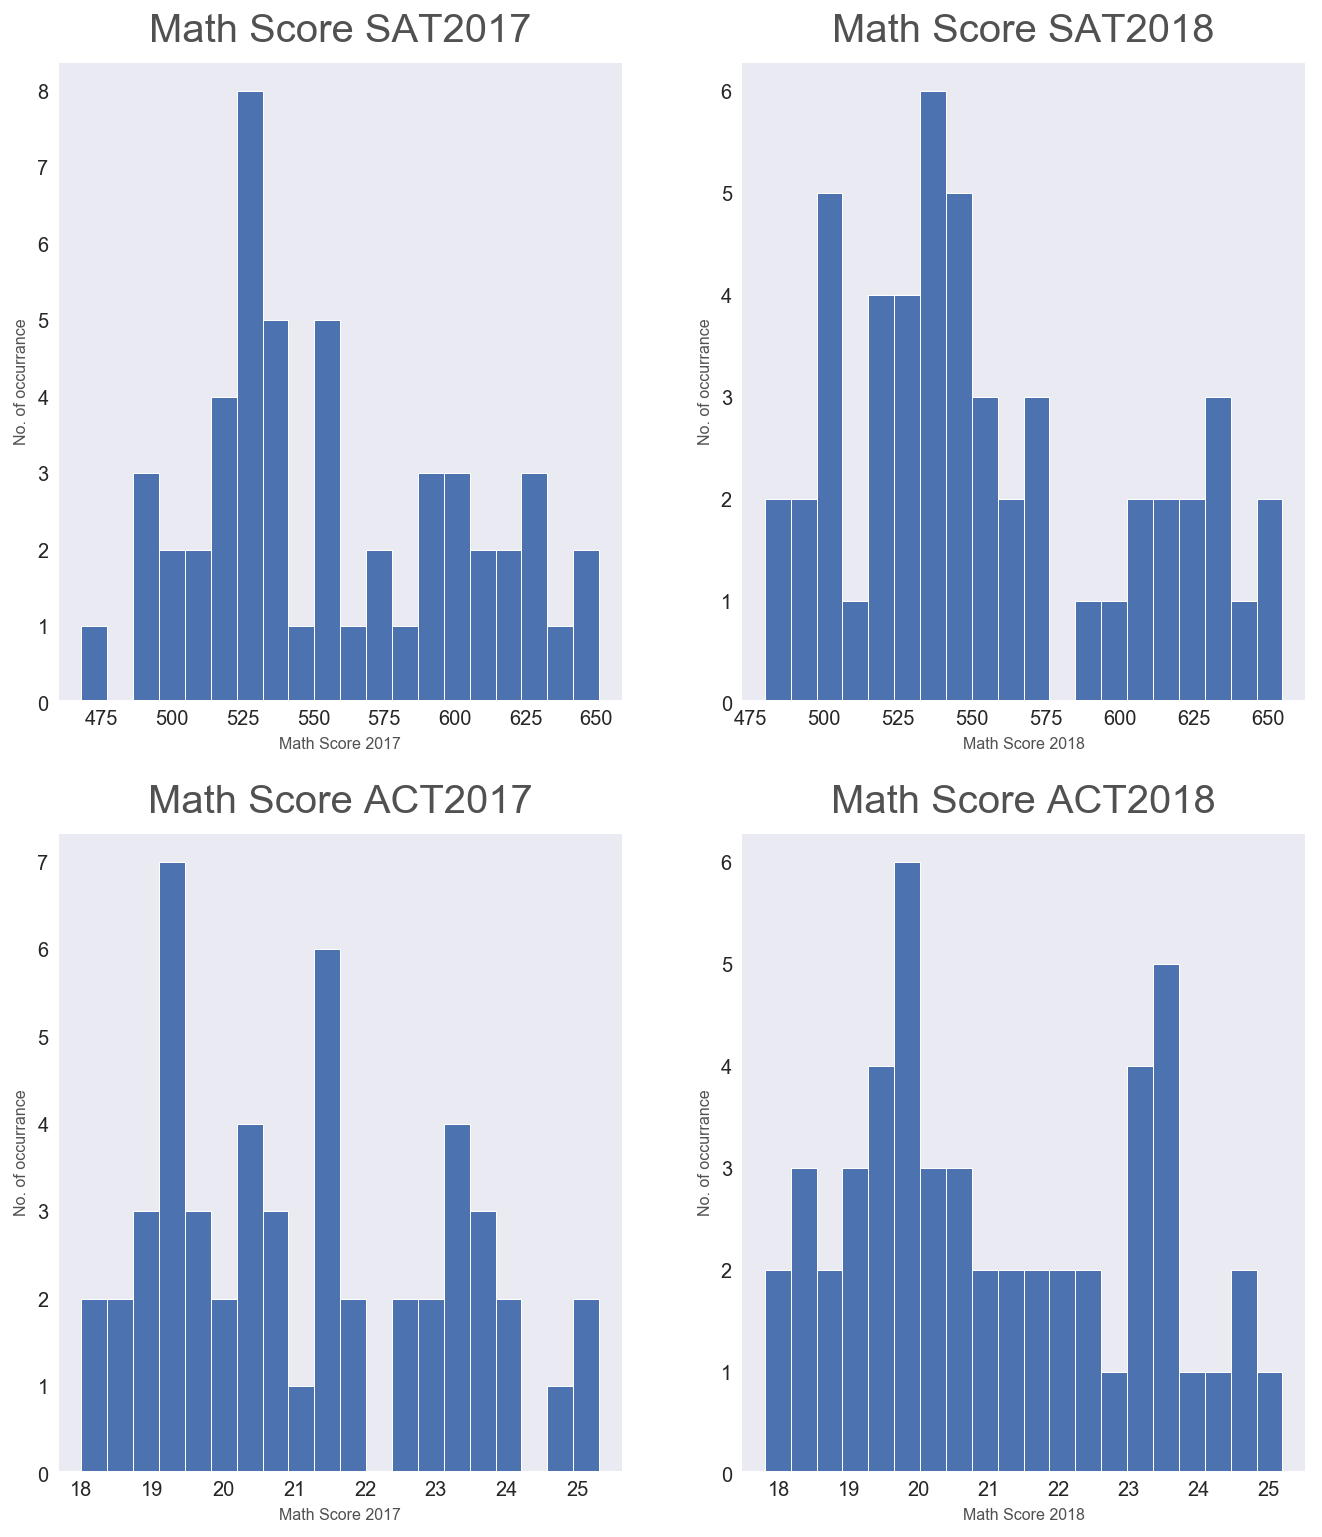

In [237]:
# Plotting Math scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Math Score SAT2017',  'Math Score SAT2018', 'Math Score ACT2017','Math Score ACT2018']
#Setting up labels
list_of_xlabels1 = ['Math Score 2017', 'Math Score 2018','Math Score 2017', 'Math Score 2018']
#Setting up columns
list_of_columns1 = [final.columns[3],  final.columns[13],final.columns[7], final.columns[18]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Intepretation**

The math score of both SAT and ACT seems to have shift towards the left, or have more states with lower math score. 

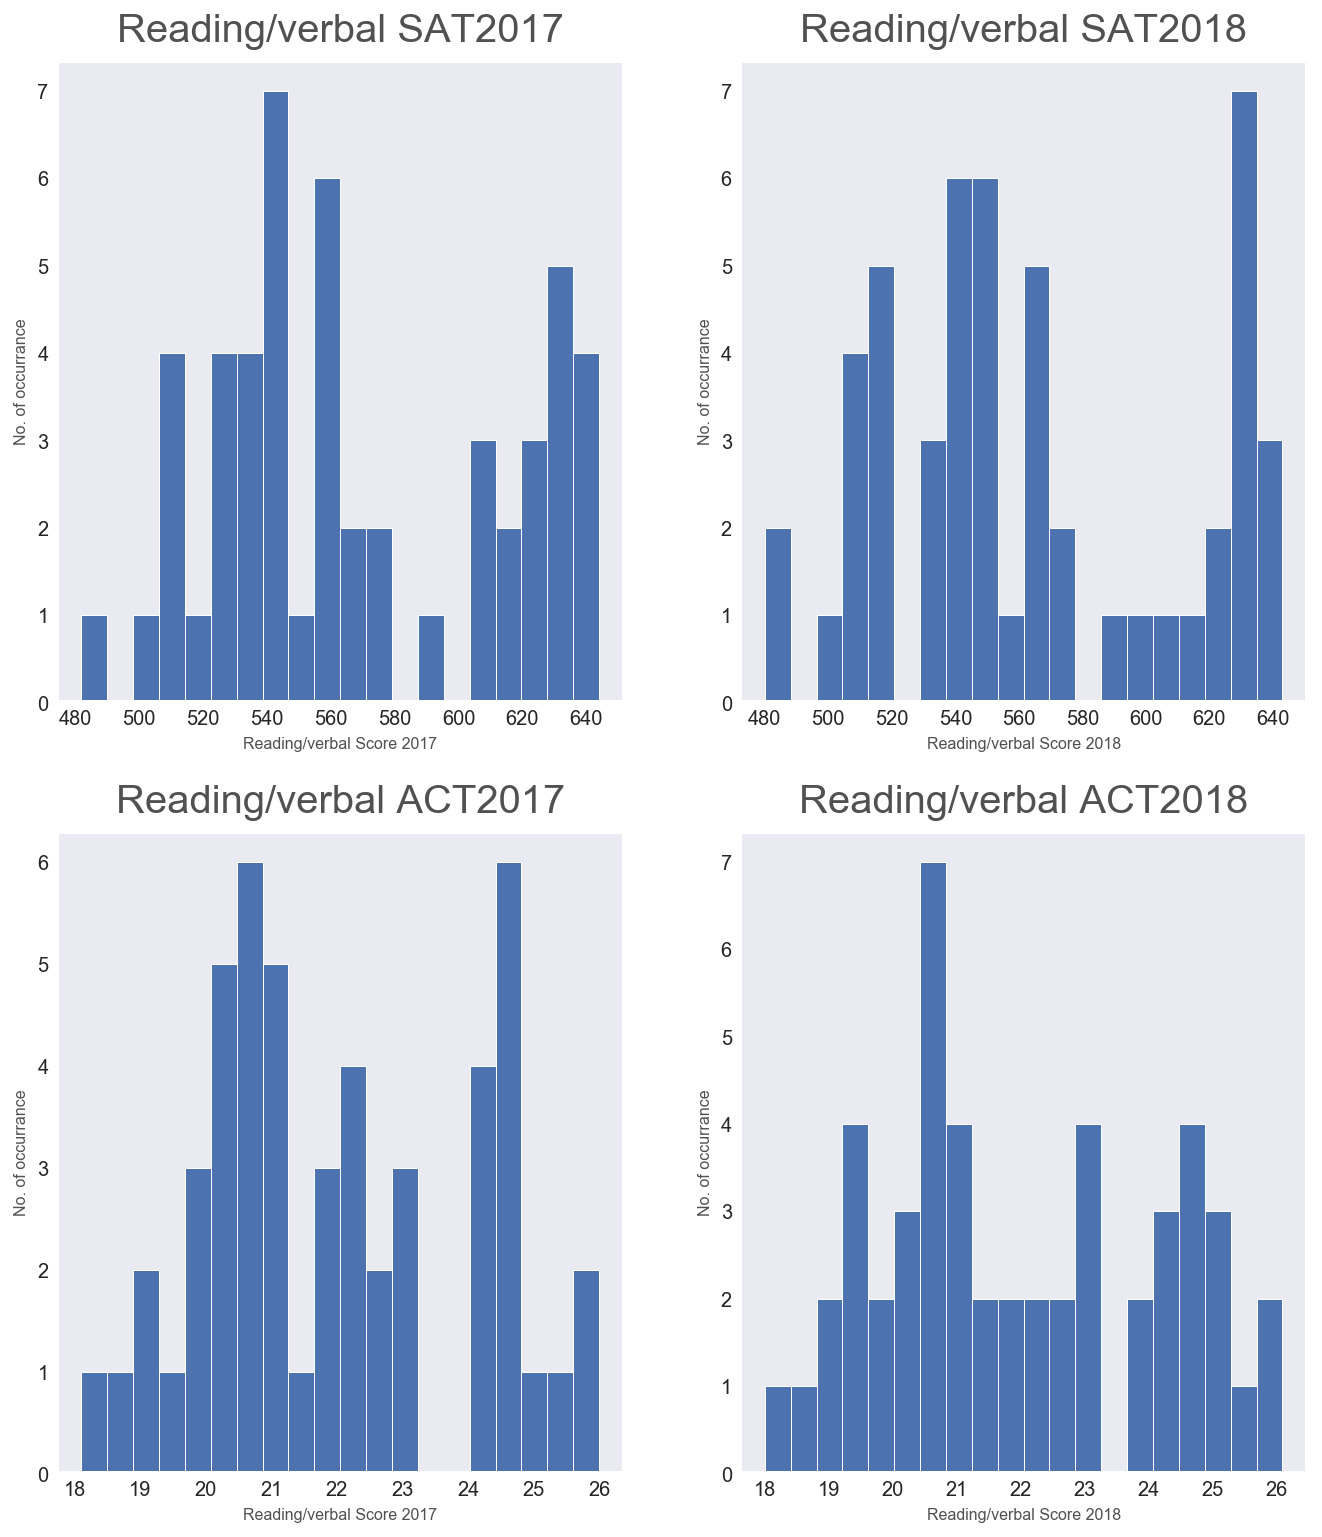

In [238]:
# Plotting Reading/verbal scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Reading/verbal SAT2017',  'Reading/verbal SAT2018', 'Reading/verbal ACT2017','Reading/verbal ACT2018']
#Setting up labels
list_of_xlabels1 = ['Reading/verbal Score 2017', 'Reading/verbal Score 2018','Reading/verbal Score 2017', 'Reading/verbal Score 2018']
#Setting up columns
list_of_columns1 = [final.columns[2],  final.columns[12],final.columns[8], final.columns[19]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

**Intepretation**

There are more states with high score for SAT in 2018 than in 2017 in EBRW. For ACT, there are lesser states with high score in Reading in 2018 than in 2017. 

#### Plot and interpret scatter plots

In [148]:
# Function to plot scatter plot
def scatter(dataframe, list_of_columns, titles,label):
    fig, ax = plt.subplots(figsize = (8,8) ) 
    ax.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]])
    ax.set_title(titles,fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8)
    ax.set_xlabel(label[0], fontsize = 15)
    ax.set_ylabel(label[1],  fontsize = 15)
        

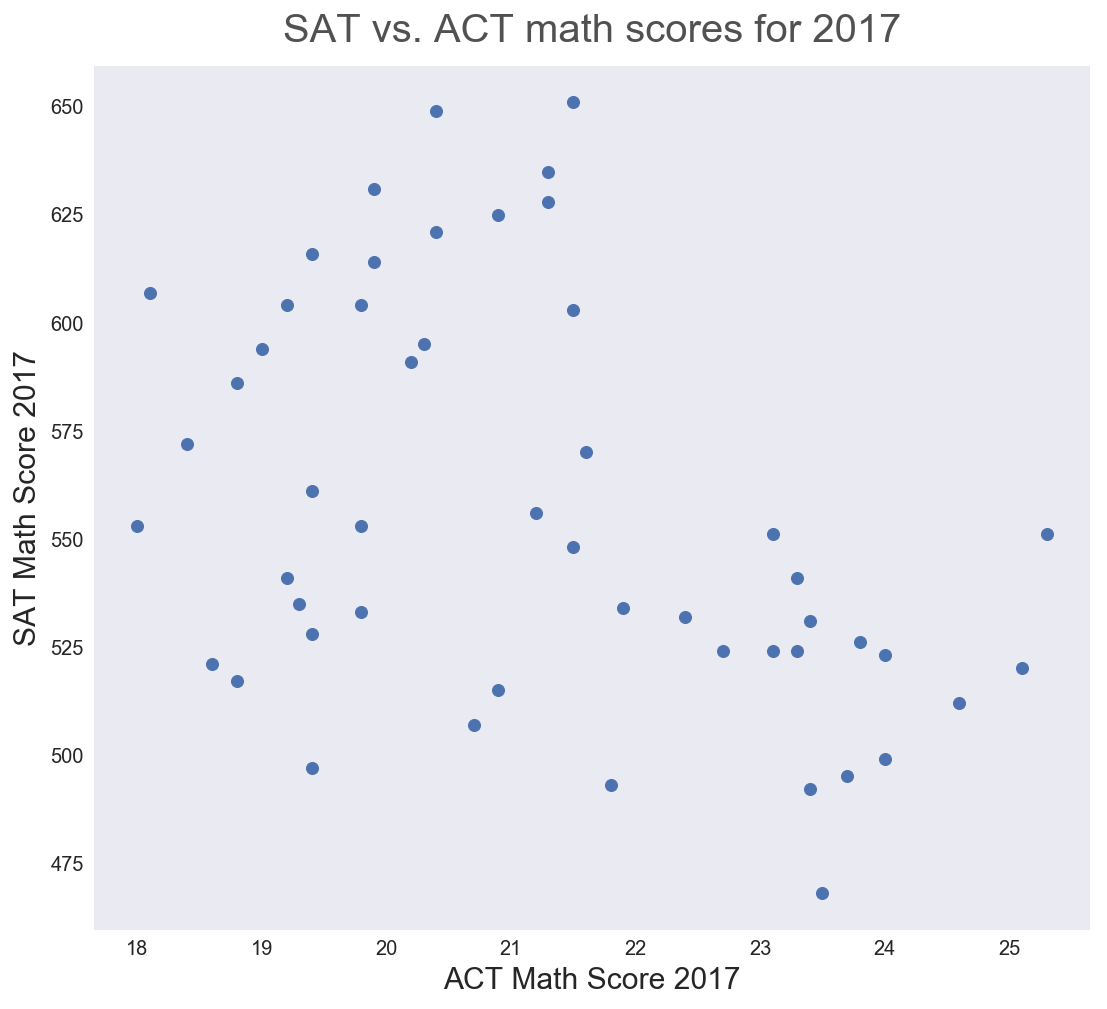

In [149]:
#Plotting SAT vs. ACT math scores for 2017'
#setting title
titles = 'SAT vs. ACT math scores for 2017'
#setting label
label = ['ACT Math Score 2017', 'SAT Math Score 2017']
#plotting scatter graph
scatter(final, ['17_act_math','17_sat_math'], titles, label)

**Intepretation**

There is an inverse relationship between SAT & ACT math score in 2017. States with higher score in ACT math tend to have lower score for SAT Math.

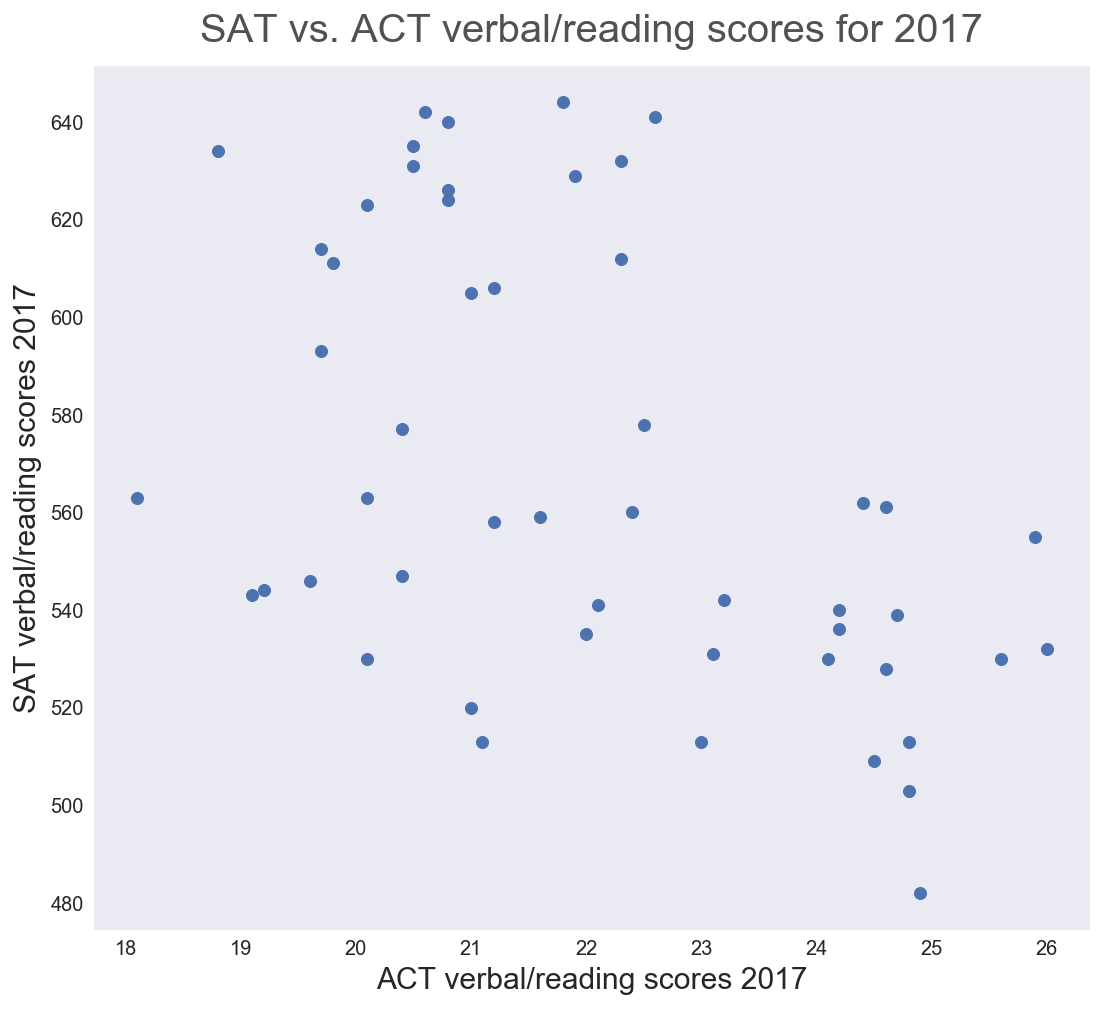

In [150]:
#SAT vs. ACT verbal/reading scores for 2017
#setting title
titles = 'SAT vs. ACT verbal/reading scores for 2017'
#setting label
label = ['ACT verbal/reading scores 2017', 'SAT verbal/reading scores 2017']
#plotting scatter graph
scatter(final, ['17_act_reading','17_sat_ebrw'], titles, label)

**Intepretation**

There is an inverse relationship between SAT & ACT verbal/reading score in 2017. States with higher score in ACT verbal/reading tend to have lower score for SAT verbal/reading.

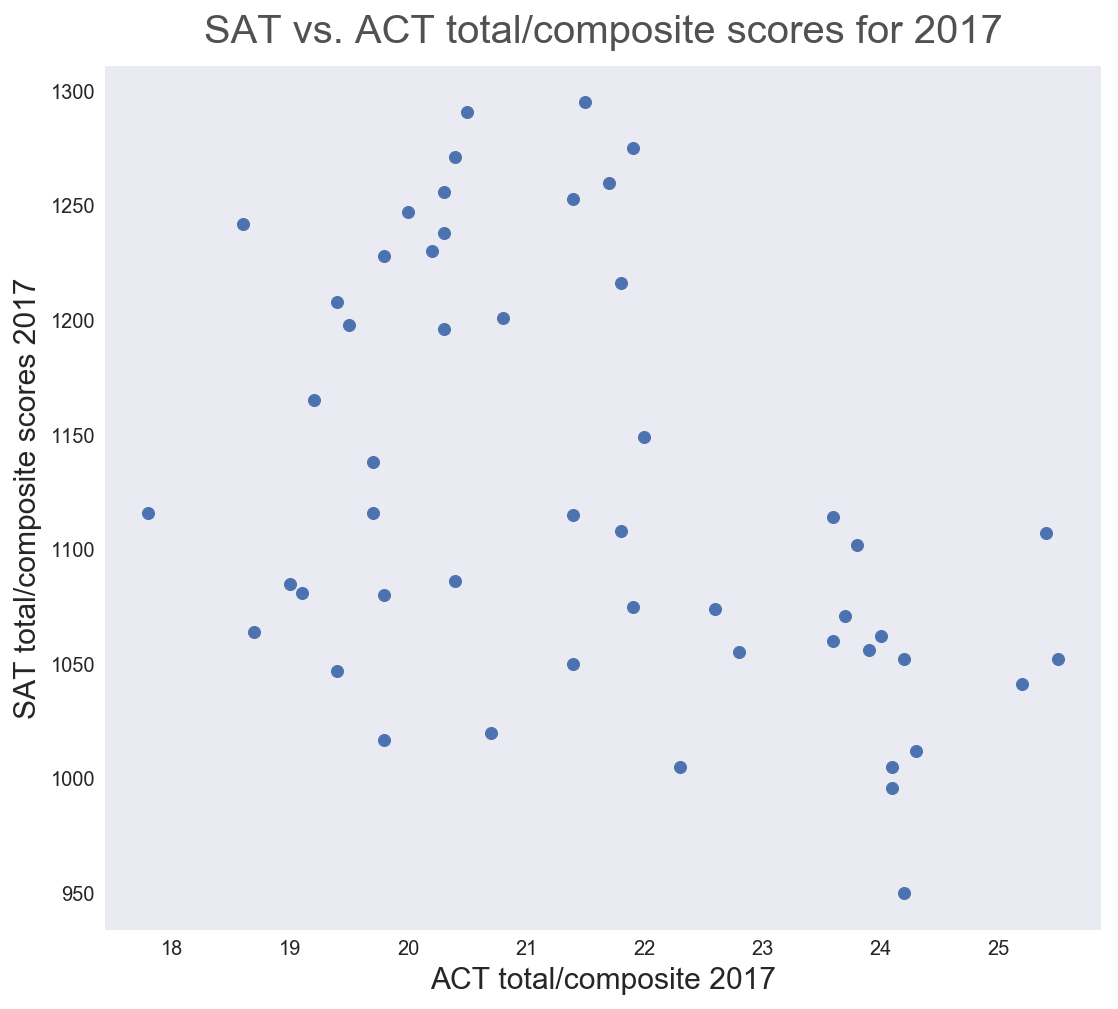

In [151]:
#SAT vs. ACT total/composite scores for 2017
#setting title
titles = 'SAT vs. ACT total/composite scores for 2017'
#setting label
label = ['ACT total/composite 2017', 'SAT total/composite scores 2017']
#plotting scatter graph
scatter(final, ['17_act_composite','17_sat_total'], titles, label)

**Intepretation**

There is an inverse relationship between SAT & ACT total.composite score in 2017. States with higher score in ACT tend to have lower score for SAT.

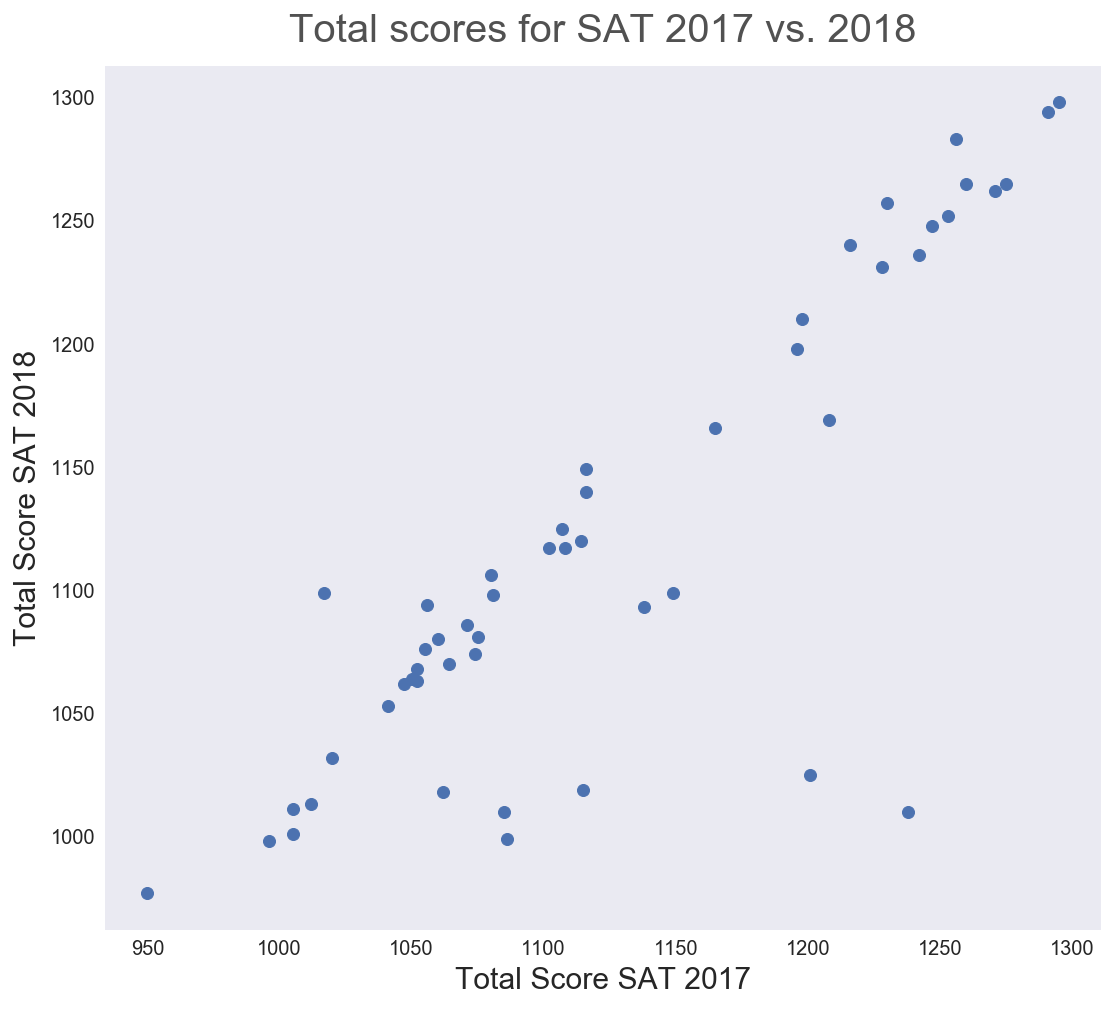

In [152]:
#Total scores for SAT 2017 vs. 2018
#setting title
titles = 'Total scores for SAT 2017 vs. 2018'
#setting label
label = ['Total Score SAT 2017', 'Total Score SAT 2018']
#plotting scatter graph
scatter(final, ['17_sat_total','18_sat_total'], titles, label)

**Intepretation**

In general, states tend to score as well in 2018 as in 2017 for SAT, with a few exceptions. 

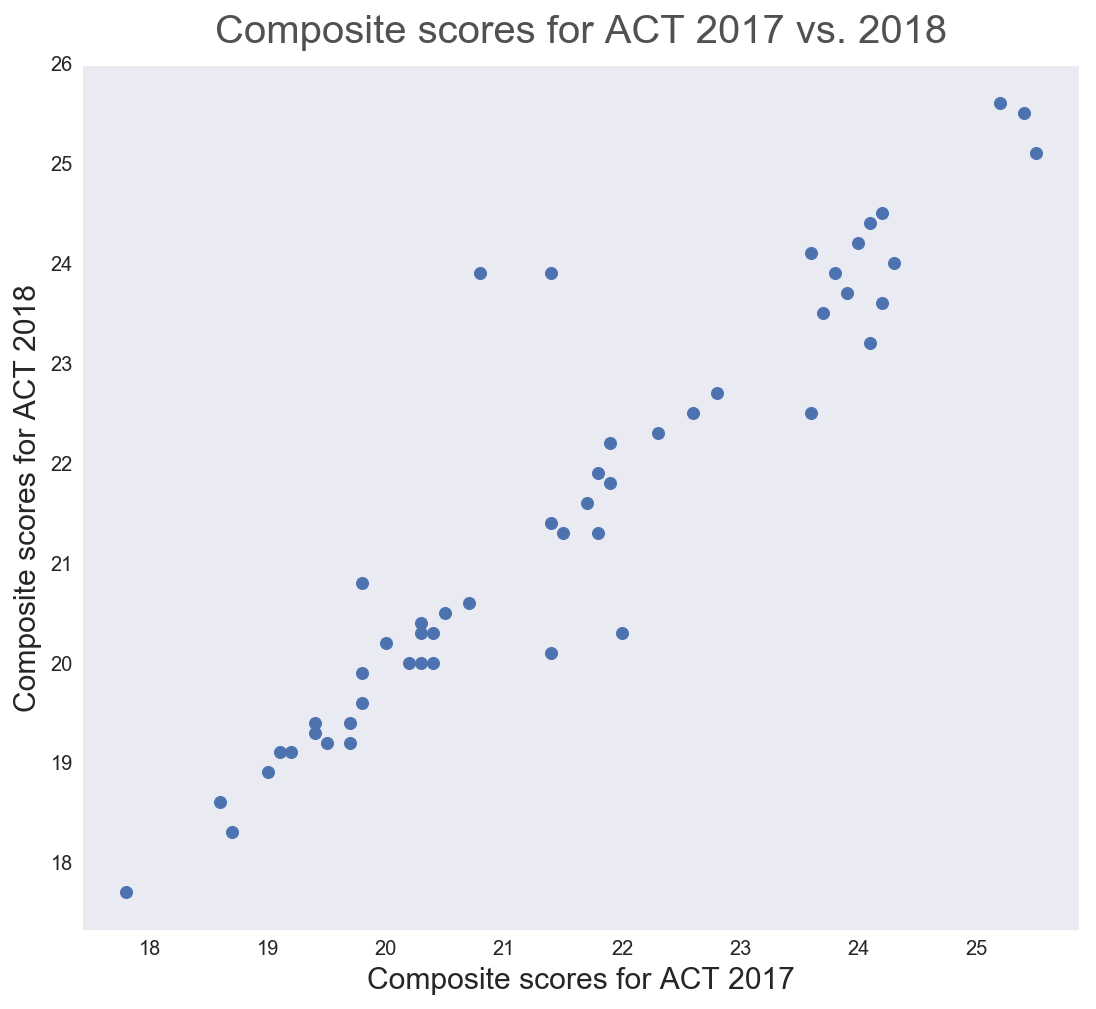

In [153]:
#Composite scores for ACT 2017 vs. 2018
#setting title
titles = 'Composite scores for ACT 2017 vs. 2018'
#setting label
label = ['Composite scores for ACT 2017', 'Composite scores for ACT 2018']
#plotting scatter graph
scatter(final, ['17_act_composite','18_act_composite'], titles, label)

**Intepretation**

In general, states tend to score as well in 2018 as in 2017 for ACT, with a few exceptions. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

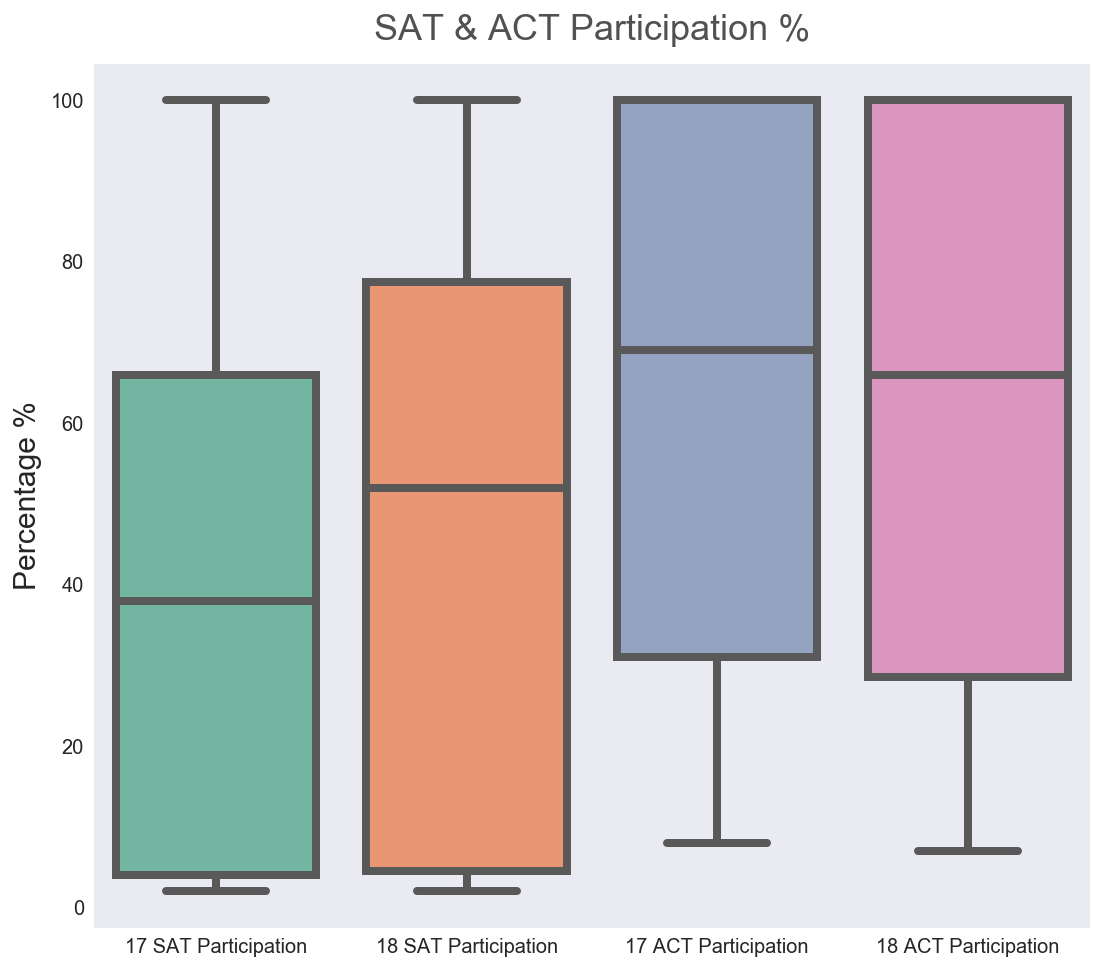

In [167]:
# Plotting Box plot for participation rate

#setting up the axis
xaxis = ['17 SAT Participation', '18 SAT Participation', '17 ACT Participation', '18 ACT Participation']
yaxis = [final['17_sat_part'],final['18_sat_part'],final['17_act_part'],final['18_act_part']]

#plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('SAT & ACT Participation %',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Percentage %',fontsize=15)
plt.savefig('SAT & ACT Participation boxplot.png'); 

**Intepretation**

The middle value of all 4 sets of data are quite wide spread, showing that there are wide differences between the participation rate for both test in all states in America. Distribution of SAT participation is skewed to the right while ACT is skewed to the left.

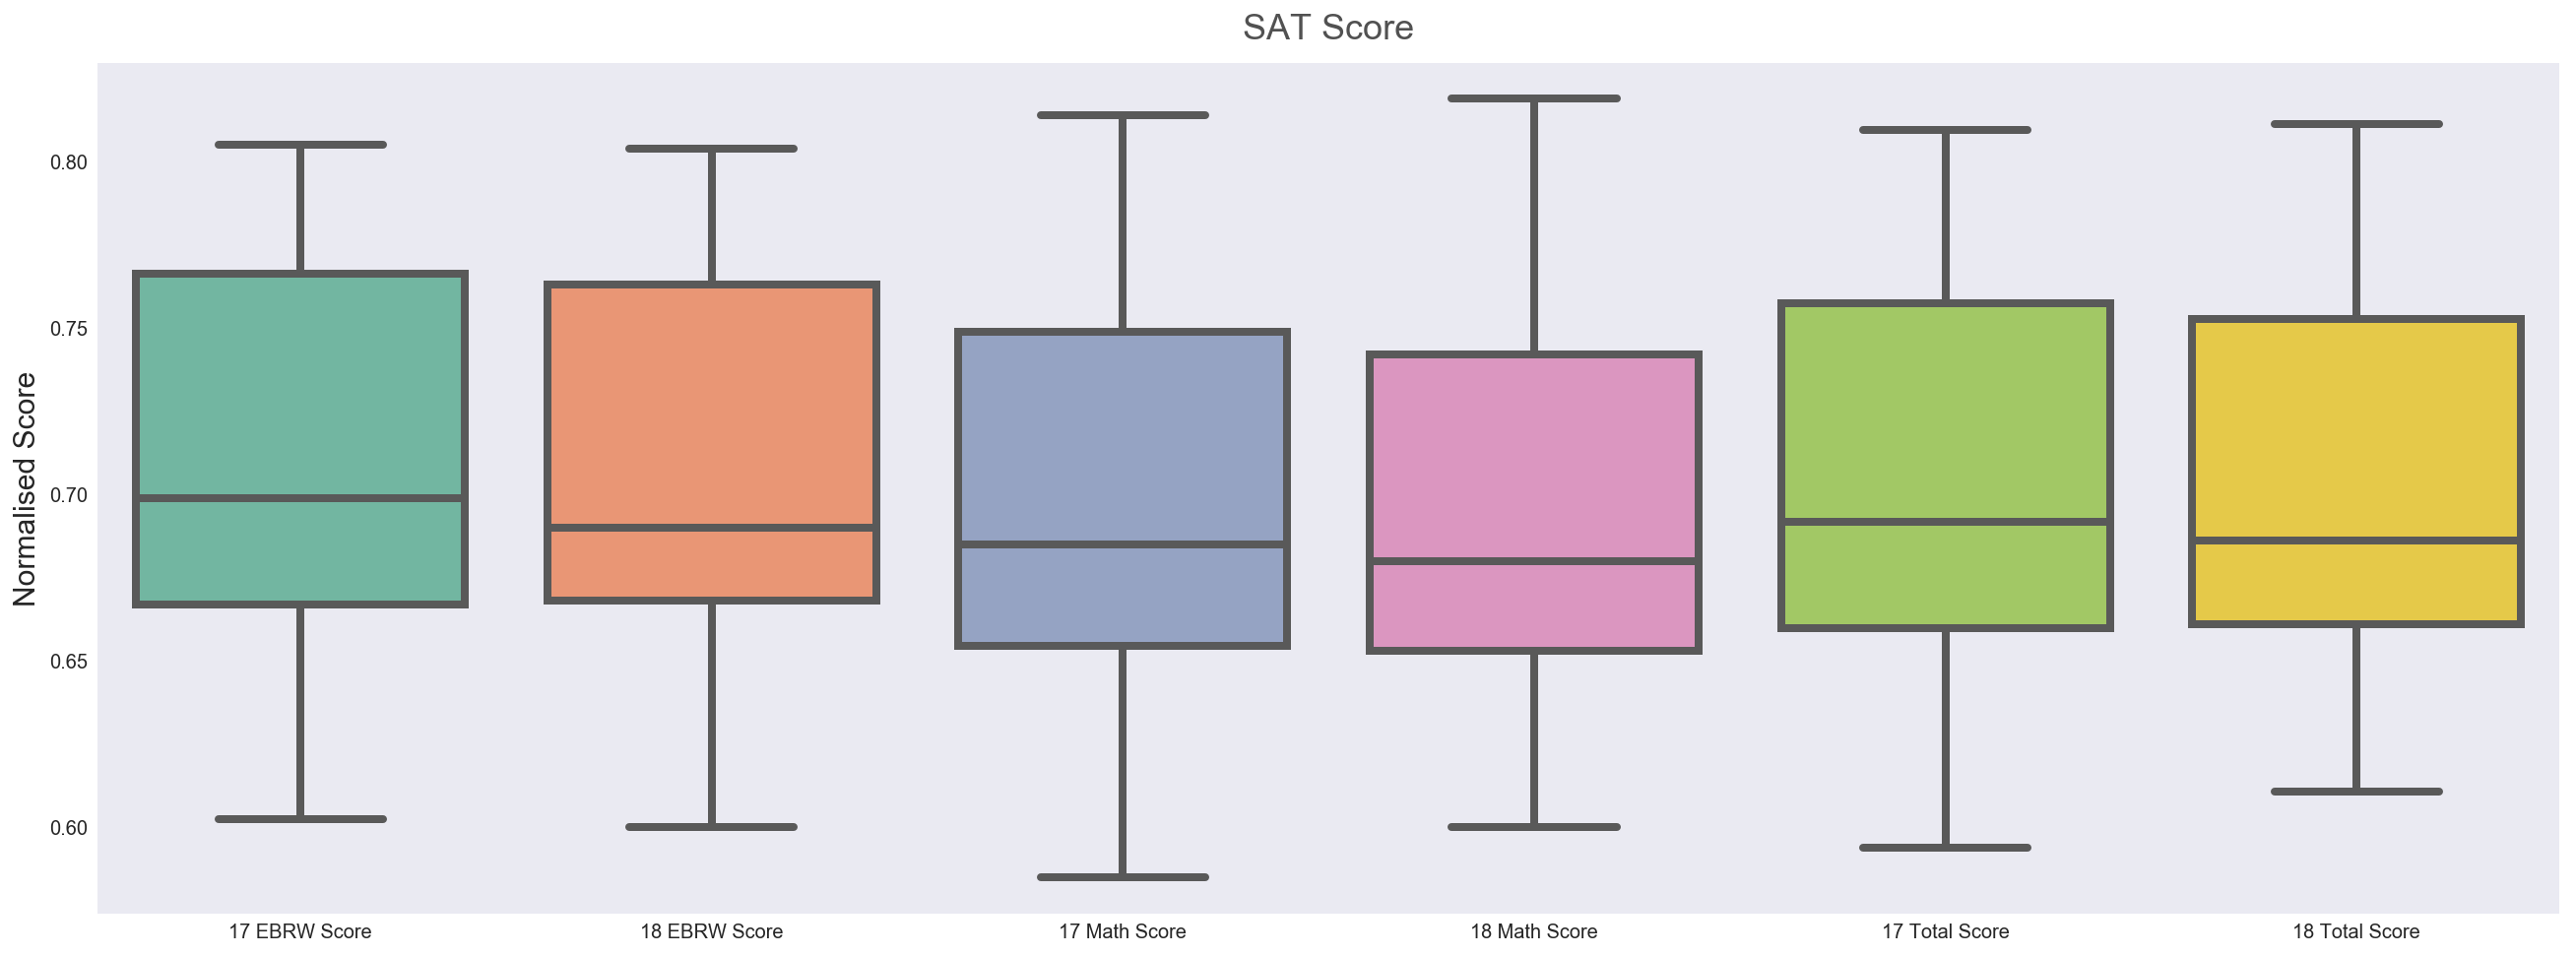

In [171]:
# Plotting Box plot for SAT score
#setting up the axis
xaxis = ['17 EBRW Score', '18 EBRW Score', '17 Math Score', '18 Math Score', '17 Total Score', '18 Total Score']
yaxis = [final['17_sat_ebrw']/800,final['18_sat_ebrw']/800,final['17_sat_math']/800,final['18_sat_math']/800, final['17_sat_total']/1600, final['18_sat_total']/1600]

#plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('SAT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Normalised Score',fontsize=15)
plt.savefig('SAT Score boxplot.png'); 

**Intepretation**

There are little changes to the spread of data between 2017 and 2018 for various subject scores of SAT, including the total score. No outlier detected. Distribution is close to normal, with EBRW skewing more to left.

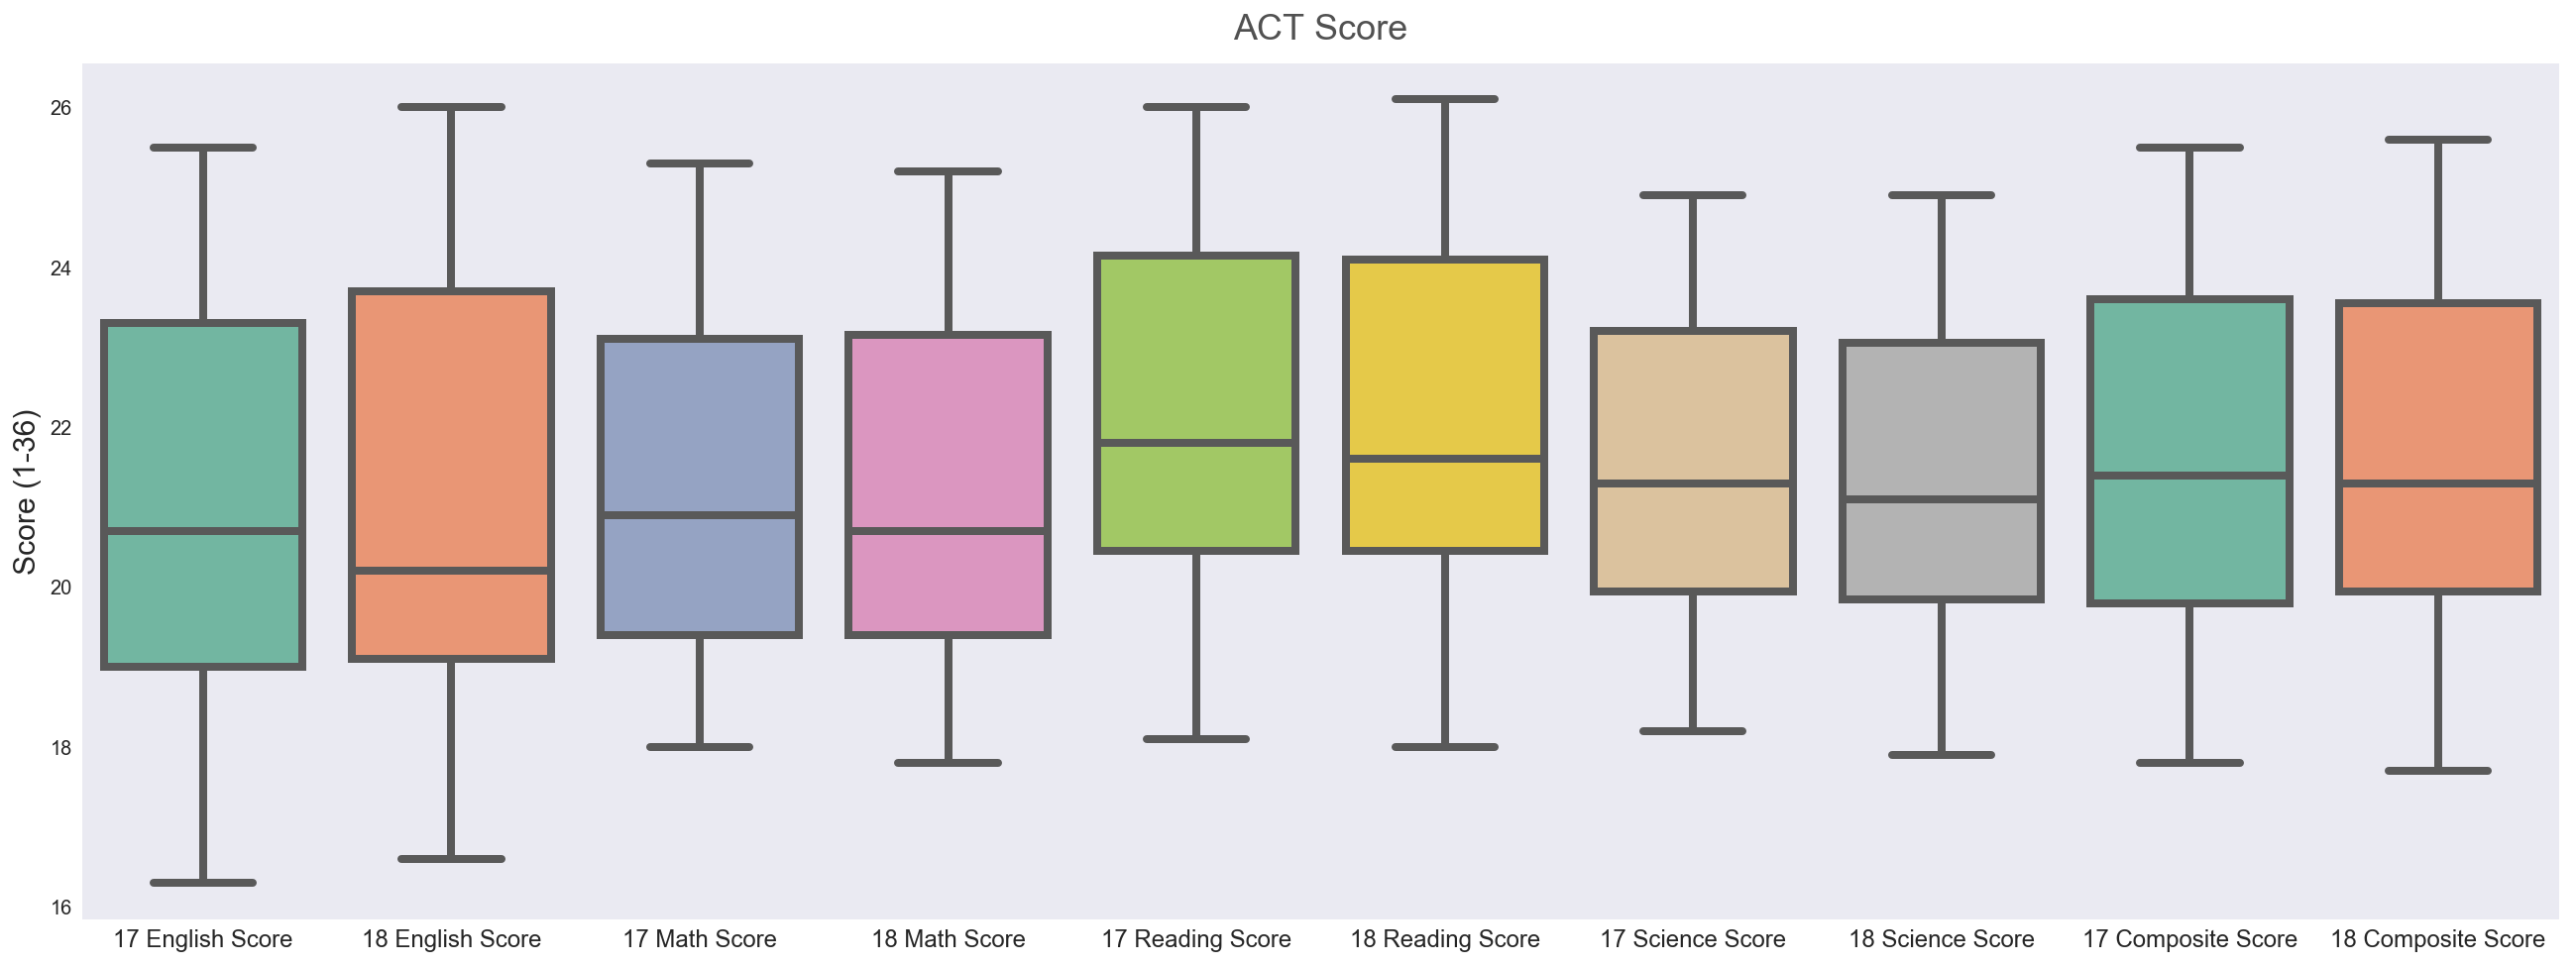

In [169]:
# Plotting Box plot for ACT score
#setting up the axis
xaxis = ['17 English Score', '18 English Score', '17 Math Score', '18 Math Score', '17 Reading Score', '18 Reading Score', '17 Science Score','18 Science Score','17 Composite Score','18 Composite Score']
yaxis = [final['17_act_english'],final['18_act_english'],final['17_act_math'],final['18_act_math'], final['17_act_reading'], final['18_act_reading'], final['17_act_science'],final['18_act_science'],final['17_act_composite'],final['18_act_composite']]

#plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('ACT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Score (1-36)',fontsize=15)
ax.set_xticklabels(labels = xaxis,fontsize=12);
plt.savefig('ACT Score boxplot.png'); 

**Intepretation**

ACT English score has the widest spread among all subjects. There are no significant changes to the spread of ACT scores between 2017 and 2018, no outlier is detected. Distribution is close to normal for all.

### Additional Plot

Plotting participation rate of change of both tests from 2017 to 2018 for 3 states: Colorado, Florida and New York. 

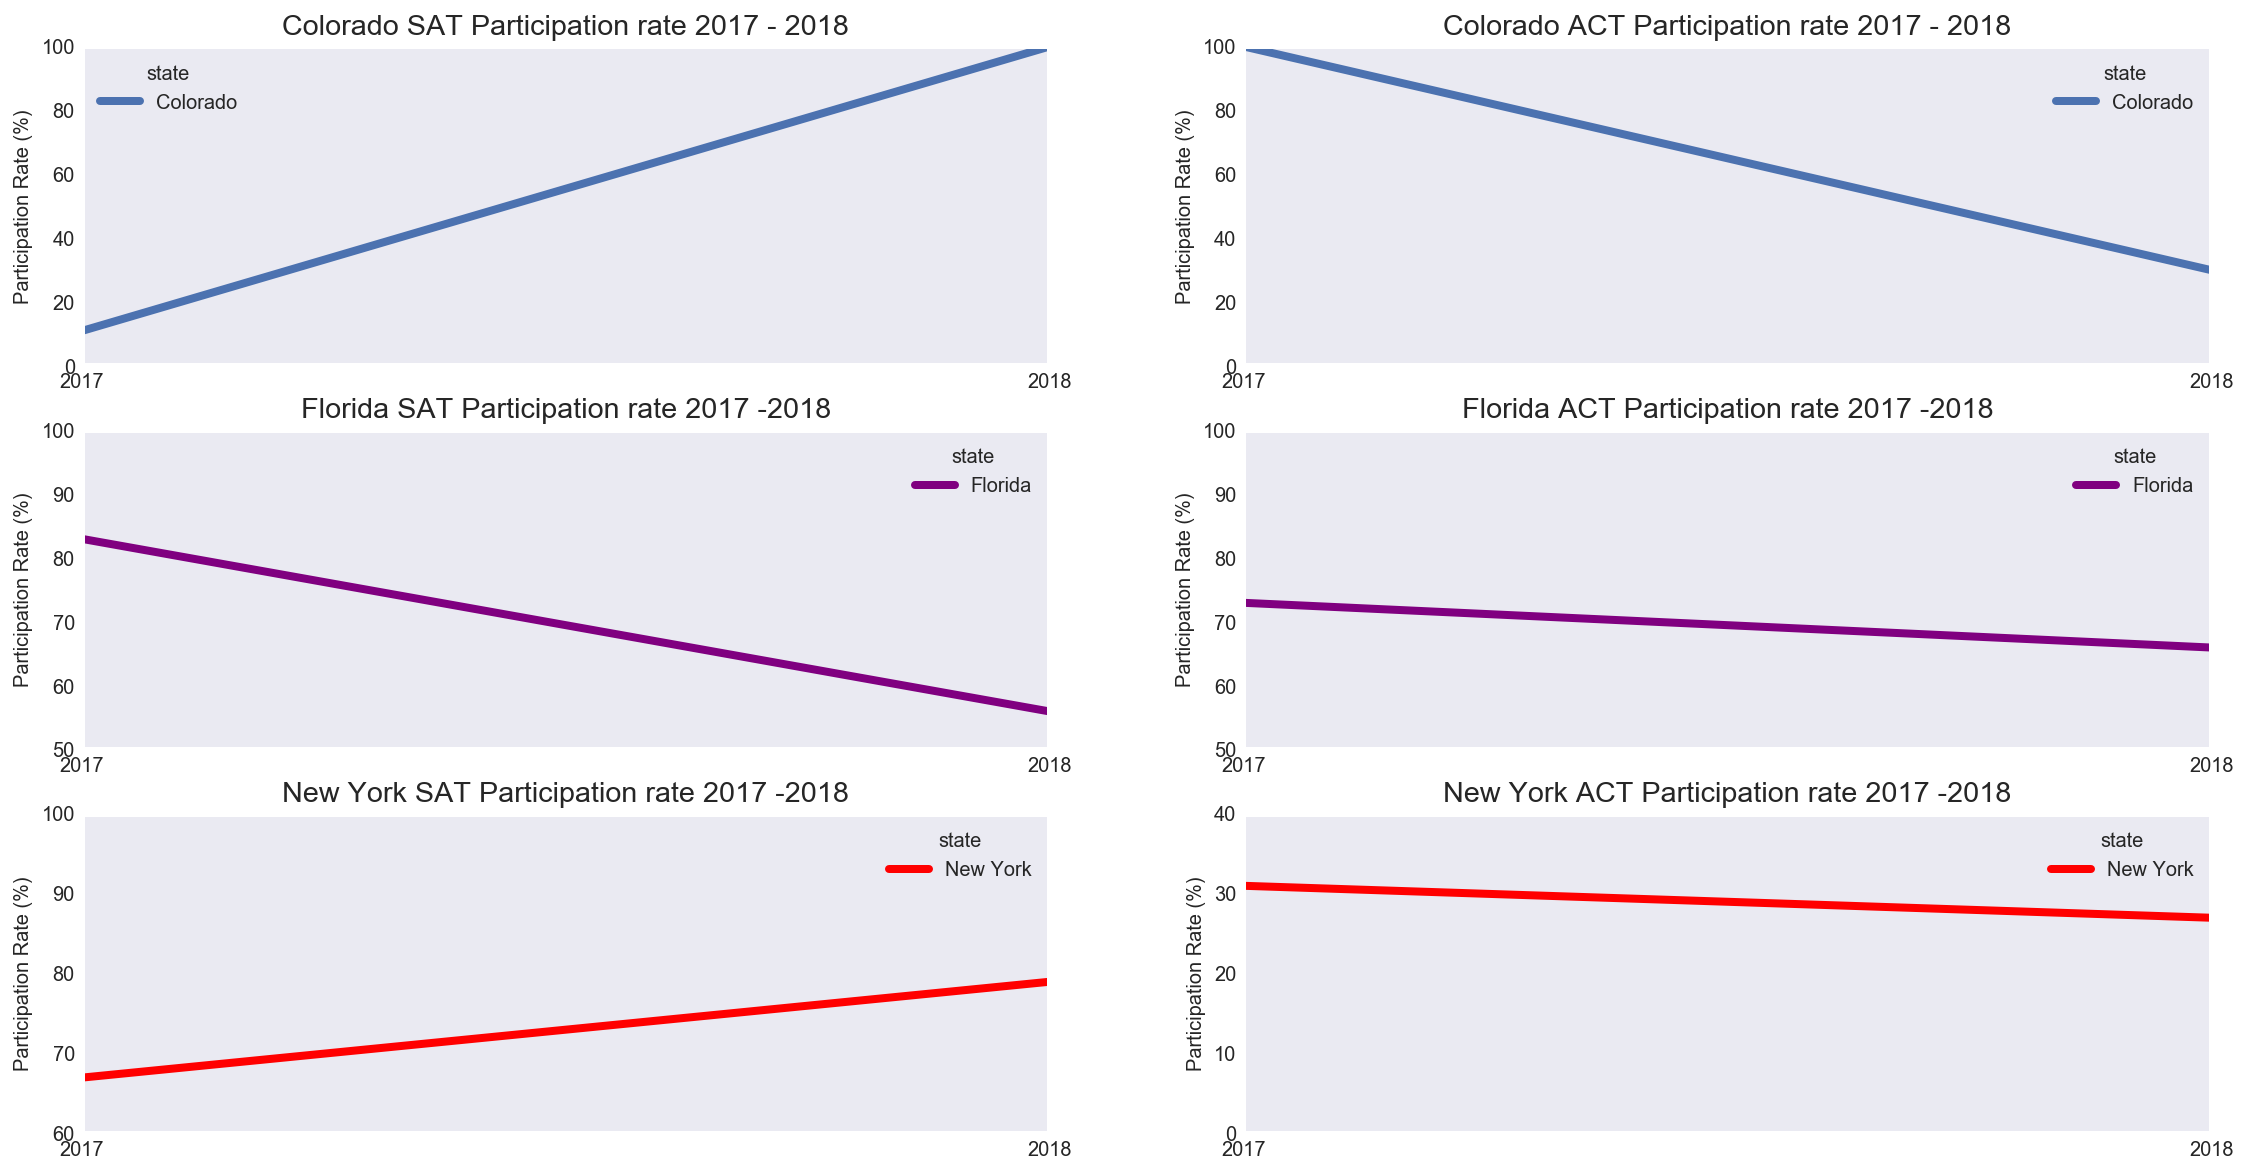

In [229]:
#Filtering to the dataframe which consist of only Colorado, Florida and New York participation rate for SAT & ACT in both years
state_plot = final[(final['state'] == 'Colorado')|(final['state'] == 'Florida')|(final['state'] == 'New York')][['state','17_sat_part','18_sat_part','17_act_part','18_act_part']]
state_plot_T = state_plot.T #Transpose dataframe
new_header = state_plot_T.iloc[0] #assign 1st row as new header 
state_plot_T = state_plot_T[1:] #drop off the 1st column of old header
state_plot_T.columns = new_header #replace with new header

#setting up subplot
fig, axes = plt.subplots(3,2, figsize=(20,20))

#Plotting Colorado SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[0:2,:1].plot(figsize=(17,9), fontsize=10, ax=axes[0][0])
axes[0][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[0][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[0][0].set_ylim(0,100);
axes[0][0].set_title('Colorado SAT Participation rate 2017 - 2018');

#Plotting Colorado ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,:1].plot(figsize=(17,9), fontsize=10, ax=axes[0][1])
axes[0][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[0][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[0][1].set_ylim(0,100);
axes[0][1].set_title('Colorado ACT Participation rate 2017 - 2018');

#Plotting Florida SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[0:2,1:2].plot(figsize=(17,9), color ='purple', fontsize=10, ax=axes[1][0])
axes[1][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[1][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[1][0].set_ylim(50,100);
axes[1][0].set_title('Florida SAT Participation rate 2017 -2018');

#Plotting Florida ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,1:2].plot(figsize=(17,9),color ='purple', fontsize=10, ax=axes[1][1])
axes[1][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[1][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[1][1].set_ylim(50,100);
axes[1][1].set_title('Florida ACT Participation rate 2017 -2018');

#Plotting New York SAT participation rate of change between 2017 & 2018
state_plot_T.iloc[:2,-1:].plot(figsize=(17,9), color ='red', fontsize=10, ax=axes[2][0])
axes[2][0].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[2][0].set_ylabel('Participation Rate (%)',fontsize=10);
axes[2][0].set_ylim(60,100);
axes[2][0].set_title('New York SAT Participation rate 2017 -2018');

#Plotting New York ACT participation rate of change between 2017 & 2018
state_plot_T.iloc[2:,-1:].plot(figsize=(17,10),color ='red', fontsize=10, ax=axes[2][1])
axes[2][1].set_xticklabels(['2017','','','','','2018'],fontsize=10);
axes[2][1].set_ylabel('Participation Rate (%)',fontsize=10);
axes[2][1].set_ylim(0,40);
axes[2][1].set_title('New York ACT Participation rate 2017 -2018');

plt.savefig('3 State line plot.png'); 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

|Variable|Mean|STD|Q1|Q2|Q3|Min|Max|Description based on statistics & boxplot|
|---|---|---|---|---|---|---|---|---|
|**17_sat_part**|40|35|4|38|66|2|100|Distribution is skewed to the right with a wide spread data from mean|
|**17_sat_ebrw**|569|45|533|559|613|482|644|Distribution is slightly skewed to the left|
|**17_sat_math**|557|47|523|548|599|468|651|Distribution is not skewed|
|**17_sat_total**|1126|93|1055|1107|1212|950|1295|Distribution is not skewed|
|**18_sat_part**|46|37|5|52|78|2|100|Distribution is skewed to the right with a wide spread data from mean|
|**18_sat_ebrw**|564|48|535|552|611|180|643|Distribution is slightly skewed to the left|
|**18_sat_math**|556|48|522|544|594|480|655|Distribution is not skewed|
|**18_sat_total**|1120|94|1058|1098|1204|977|1298|Distribution is not skewed|
|**17_act_part**|65|32|31|69|100|8|100|Distribution is skewed to the left with a wide spread data from mean|
|**17_act_english**|21|2|19|20|23|16|26|Distribution is not skewed|
|**17_act_math**|21|2|19|21|23|18|25|Distribution is slightly skewed to the right|
|**17_act_reading**|22|2|21|22|24|18|26|Distribution is slightly skewed to the left|
|**17_act_science**|22|2|20|21|23|18|25|Distribution is not skewed|
|**17_act_composite**|22|2|20|21|24|18|26|Distribution is not skewed|
|**18_act_part**|61|34|29|66|100|7|100|Distribution is skewed to the left with a wide spread data from mean|
|**18_act_english**|21|3|19|20|24|17|26|Distribution is not skewed|
|**18_act_math**|21|2|19|21|23|18|25|Distribution is slightly skewed to the right|
|**18_act_reading**|22|2|21|22|24|18|26|Distribution is not skewed|
|**18_act_science**|21|2|18|20|21|23|25|Distribution is not skewed|
|**18_act_composite**|22|2|20|21|24|18|26|Distribution is not skewed|

In general, the data of SAT has an inverse relationship with corresponding data of ACT with correlation of -0.5 ~ -0.4

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, because there are data in the sample that are skewed and hence not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

The assumption does not hold for all 3 variables, as the plotted histograms for these 3 variable do not resemble a normally distribuion graph. This imply that we are unable to apply central limit therom to make estimation unless our sample size is larger than 30. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: We are only able to conduct statistical inference for the participation rate of both tests in the same year as they would have the same population size. Other than that, as the population size vary across the test and year, it does not make sense to make any inference from these data. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No. Because SAT and ACT has different number of students taking the test. Hence, . We can, however, compare the year-on-year changes or determine if there is any corrorelation between the 2 variables. 

#### Hypothesis Testing 

$$ H_0: \mu_{\text{2017 SAT Participation}} - \mu_{\text{2017 ACT Participation}} = 0 $$

$$ H_A: \mu_{\text{2018 SAT Participation}} - \mu_{\text{2018 ACT Participation}} \ne 0 $$

In [157]:
#Testing for 2017
t_stat,p_value = stats.ttest_ind(final['17_sat_part'],final['17_act_part'])
t_stat,p_value

(-3.8085778908170544, 0.00024134203698662353)

Since P is significantly smaller than 0.05, we can reject H0 and conclude that the mean participation of SAT is not equal to ACT in 2017. 

In [158]:
#Testing for 2018
t_stat,p_value = stats.ttest_ind(final['18_sat_part'],final['18_act_part'])
t_stat,p_value

(-2.2471737667351626, 0.026826308222090527)

Since P is significantly smaller than 0.05, we can reject H0 and conclude that the mean participation of SAT is not equal to that of ACT in 2017. However, we can also see that the P value increase by 100 times, which means that there is a higher probability that the mean participation of SAT is equal to that of ACT in 2018. 

## Outside Research

In [238]:
final[(final['state'] == 'Colorado')|(final['state'] == 'Florida')|(final['state'] == 'New York')][['state','17_sat_part','18_sat_part','17_act_part','18_act_part']]

,state,17_sat_part,18_sat_part,17_act_part,18_act_part
5,Colorado,11.0,100.0,100.0,30.0
9,Florida,83.0,56.0,73.0,66.0
32,New York,67.0,79.0,31.0,27.0


#### Colorado

The SAT participation rate of Colorado increase to 100% in 2018 from 11% in 2017. This is because Colorado made a change to making SAT their mandatory standardised test for high school students in 2017. The process is an opening bidding process where both SAT and ACT has to compete for the tender from Colorado. SAT won the bid even though ACT was traditionally the mandated test in Colorado. This may be due to SAT being a more accurate indicator of whether the students are ready for colleage, and also because SAT provide a better service and resources for students taking the test ([Source](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)). Another reason might be the wavier program of SAT is more flexible with less strict requirement as compared to ACT, hence SAT is a more inclusive program than ACT. 


#### Florida

Competition between ACT and SAT has always been competitive in Florida since 2006 ([Source](https://www.washingtonpost.com/local/education/sat-usage-declined-in-29-states-over-7-years/2014/03/15/f4504cfc-a5ff-11e3-8466-d34c451760b9_story.html)). In general, the average score of SAT and ACT in florida are also lower than national average. Hence may indicate that the overall interests in either exam is low in florida, hence the drop in participation rate for both SAT and ACT over 2017 and 2018. However in 2019, Flroida has a a high participation rate of 97% ([Source](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)) because of the free SAT “school day” initiative, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents.


#### New York
New York has an increase in SAT participation rate from 69 to 79 from 2017 to 2018. This is hugely due to the new initiative that allows all high-school juniors to take the exam for free during the school day. Futhermore, free wavier ($2.2 million USD / year) is provided to low-income students to make SAT more inclusive, which also contributed to the higher participation rate of New York. ([Source](https://chalkbeat.org/posts/ny/2018/01/11/record-number-of-new-york-city-students-take-sat-after-city-offers-test-for-free/))


## Conclusions and Recommendations

Based on the hypothesis testing, there may be a higher probability that the difference between the mean participation rate of SAT and ACT is decreasing. We also know from our dataset that the mean participation rate of ACT dropped from 65 to 61 and mean participation rate of SAT increased from 40 to 46. Hence we can infer that there is a trend in USA with more and more students taking up SAT. 

Our previous analysis of the 3 states (Colorado, Florida and New York) showed that SAT's wavier and allowing students to take exam during schol days program have increased the popularity of SAT effectively. 

Hence, the focus of the colleage board should be targeting a state that has not yet make ACT mandatory with low SAT participation rate, which is the state of Iowa. The following recommendation are made based on the Every Student Succeeds Act requirement signed by President Obama in 2015. ([Source](https://www.ed.gov/esea))

**Recommendation on increasing participation rate in Iowa:**

1) Widen the wavier eligibility of students to more lower income group

2) Consider providing more support in terms of preparing for SAT exam to lower income group, especially in math and science (where the average scores are lower than that of Evidence-Based, Reading and Writing)

3) Reach out to minority group such as black african american and provide equity opportunity to the groups to take SAT

4) Create awareness about SAT's inclusive program to state government and universities in Iowa




**Data required for more analysis**

1) Income group of students which took in SAT or ACT

2) Population size of students which took SAT and ACT

3) Success rate of students entering University for each state for both SAT and ACT

4) Ethnics group of students which took SAT or ACT